# Imports

In [556]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, r2_score, precision_score, recall_score, f1_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from matplotlib.transforms import Bbox
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['axes.labelsize'] = 14
rcParams['legend.fontsize'] = 14
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# Preprocesing data

## Reading data

In [557]:
n_bound = 1
data_k = pd.read_excel('kernel_shuffled.xlsx',header=None)
data_b = pd.read_excel('bound_shuffled.xlsx', sheet_name=f'Sheet{n_bound}', header=None)

In [558]:
y_data_k = data_k.get(data_k.shape[1]-1)
X_data_k = data_k.drop(columns=data_k.shape[1]-1)
y_data_b = data_b.get(data_b.shape[1]-1) 
X_data_b = data_b.drop(columns=data_b.shape[1]-1)

## Spliting data

In [559]:
# Kernel train test
X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_data_k, y_data_k, test_size=0.2)
# Bound train test
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_data_b, y_data_b, test_size=0.2)

In [560]:
# Kernel + Bound train test
X_train_kb = pd.concat([X_train_k, X_train_b], axis=0)
y_train_kb = pd.concat([y_train_k, y_train_b], axis=0)
y_train_c = np.concatenate([np.zeros(y_train_k.shape), np.ones(y_train_b.shape)], axis=0).astype(int)
X_test_kb = pd.concat([X_test_k, X_test_b], axis=0)
y_test_kb = pd.concat([y_test_k, y_test_b], axis=0)
y_test_c = np.concatenate([np.zeros(y_test_k.shape), np.ones(y_test_b.shape)], axis=0).astype(int)

## Preparing data for classification

In [561]:
X_train = X_train_kb.assign(c=y_train_c, y=y_train_kb)
X_train = X_train.sample(frac=1).reset_index(drop=True)
y_train_class = X_train.get('c')
y_train_kb = X_train.get('y')
X_train_kb = X_train.drop(columns=['y','c'])

In [562]:
X_test = X_test_kb.assign(c=y_test_c, y=y_test_kb)
X_test = X_test.sample(frac=1,axis=0).reset_index(drop=True)
y_test_kb = X_test.get('y')
X_test = X_test.drop(columns='y')
y_test_class = X_test.get('c')
X_test_kb = X_test.drop(columns='c')

In [563]:
std_class = StandardScaler()
X_train_kb_std = std_class.fit_transform(X_train_kb, y_train_class)
X_test_kb_std = std_class.transform(X_test_kb)

(array([800.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 800.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

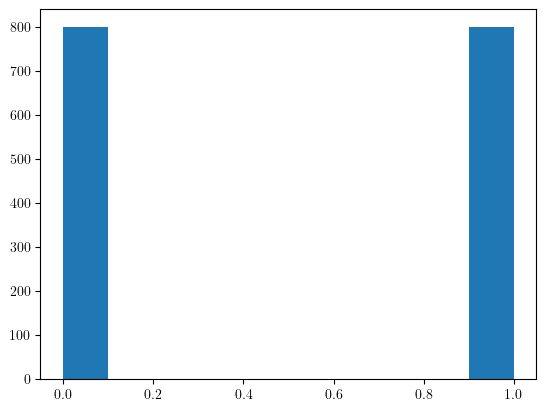

In [564]:
plt.hist(y_train_class)

## Preparing data for regression

In [565]:
std = StandardScaler()
# Kernel --> 
X_train_k_std = std.fit_transform(X_train_k, y_train_k)
# --> Kernel
X_test_k_k_std = std.transform(X_test_k)
# --> Bound
X_test_k_b_std = std.transform(X_test_b)

In [566]:
std2 = StandardScaler()
# Bound --> 
X_train_b_std = std2.fit_transform(X_train_b, y_train_b)
# --> Bound
X_test_b_b_std = std2.transform(X_test_b)
# --> Kernel
X_test_b_k_std = std2.transform(X_test_k)

In [567]:
std3 = StandardScaler()
# Kernel + Bound -->
X_train_kb_std = std3.fit_transform(X_train_kb, y_train_kb)
# --> Kernel
X_test_kb_k_std = std3.transform(X_test_k)
# --> Bound
X_test_kb_b_std = std3.transform(X_test_b)

In [568]:
y_test_b

820    0.001258
160    0.001267
346    0.001161
661    0.001243
864    0.001208
         ...   
128    0.001205
367    0.001360
547    0.001362
990    0.001136
813    0.001094
Name: 6, Length: 200, dtype: float64

# ML Classification models

Logistic Regression Report
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       200
           1       0.89      0.97      0.93       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.92       400
weighted avg       0.93      0.93      0.92       400

0.9284706119568505
0.925
0.9248478168290791
SVM Report
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       200
           1       0.90      0.97      0.93       200

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

0.932769726247987
0.93
0.9298878205128206

 Decision Tree 
 	 mean precision 	 mean recall 	 	 mean fscore 

0.0 	 0.9356 	 	 0.901 	 	 0.918 

1.0 	 0.9045 	 	 0.938 	 	 0.921 

	 std precision 	 	 std recall 	 	 std fscore 

0.0 	 0.0041 	 	 0.0049 	 	 0.0041 

<Figure size 640x480 with 0 Axes>

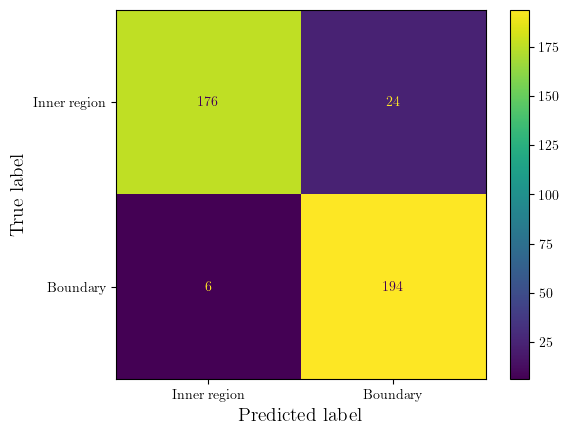

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

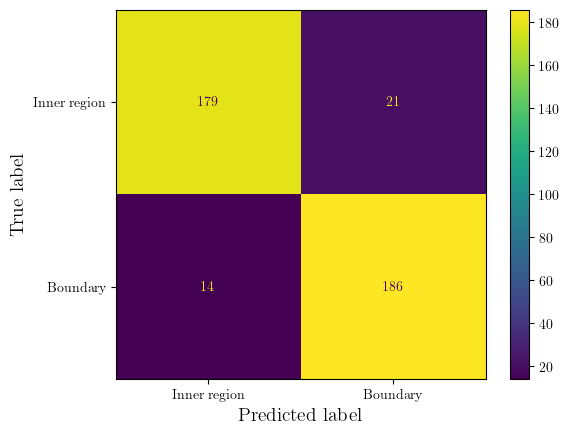

<Figure size 640x480 with 0 Axes>

In [569]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score

#LR
lr = LogisticRegression()
lr.fit(X_train_kb_std, y_train_class)
y_predict_lr = lr.predict(X_test_kb_std)
print('Logistic Regression Report\n', classification_report(y_test_class, y_predict_lr))
print(precision_score(y_test_class, y_predict_lr, average='weighted'))
print(recall_score(y_test_class, y_predict_lr, average='weighted'))
print(f1_score(y_test_class, y_predict_lr, average='weighted'))

#SVC
svc = SVC()
svc.fit(X_train_kb_std, y_train_class)
y_predict_svc = svc.predict(X_test_kb_std)
print('SVM Report\n', classification_report(y_test_class, y_predict_svc))
print(precision_score(y_test_class, y_predict_svc, average='weighted'))
print(recall_score(y_test_class, y_predict_svc, average='weighted'))
print(f1_score(y_test_class, y_predict_svc, average='weighted'))

#DT
precision_dt = []
recall_dt = []
fscore_dt = []
support_dt = []
precision_score_dt = []
recall_score_dt = []
f1_score_dt = []
for r in range(5):
    dt = DecisionTreeClassifier()
    dt.fit(X_train_kb_std, y_train_class)
    y_predict_dt = dt.predict(X_test_kb_std)
    precision,recall,fscore,support=score(y_test_class, y_predict_dt, average=None)
    precision_dt.append(precision)
    recall_dt.append(recall)
    fscore_dt.append(fscore)
    support_dt.append(support)

    p_s = precision_score(y_test_class, y_predict_dt, average='weighted')
    r_s = recall_score(y_test_class, y_predict_dt, average='weighted')
    f_s = f1_score(y_test_class, y_predict_dt, average='weighted')

    precision_score_dt.append(p_s)
    recall_score_dt.append(r_s)
    f1_score_dt.append(f_s)

precision_dt = np.array(precision_dt)
mean_precision_dt = np.mean(precision_dt, axis=0)
std_precision_dt = np.std(precision_dt, axis=0)

recall_dt = np.array(recall_dt)
mean_recall_dt = np.mean(recall_dt, axis=0)
std_recall_dt = np.std(recall_dt, axis=0)

fscore_dt = np.array(fscore_dt)
mean_fscore_dt = np.mean(fscore_dt, axis=0)
std_fscore_dt = np.std(fscore_dt, axis=0)

support_dt = np.array(support_dt)
mean_support_dt = np.mean(support_dt, axis=0)
std_support_dt = np.std(support_dt, axis=0)

print('\n','Decision Tree', '\n', '\t', 'mean precision', '\t', 'mean recall', '\t \t', 'mean fscore','\n')
print('0.0', '\t', round(mean_precision_dt[0], 4), '\t \t', round(mean_recall_dt[0], 4), '\t \t', round(mean_fscore_dt[0], 4), '\n')
print('1.0', '\t', round(mean_precision_dt[1], 4), '\t \t', round(mean_recall_dt[1], 4), '\t \t', round(mean_fscore_dt[1], 4), '\n')
print('\t', 'std precision', '\t \t', 'std recall', '\t \t', 'std fscore','\n')
print('0.0','\t', round(std_precision_dt[0], 4), '\t \t', round(std_recall_dt[0], 4), '\t \t', round(std_fscore_dt[0], 4), '\n')
print('1.0','\t', round(std_precision_dt[1], 4), '\t \t', round(std_recall_dt[1], 4), '\t \t', round(std_fscore_dt[1], 4), '\n')

print(np.mean(precision_score_dt))
print(np.mean(recall_score_dt))
print(np.mean(f1_score_dt))
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

#RF
precision_rf = []
recall_rf = []
fscore_rf = []
support_rf = []
precision_score_rf = []
recall_score_rf = []
f1_score_rf = []
for r in range(5):
    rf = RandomForestClassifier()
    rf.fit(X_train_kb_std, y_train_class)
    y_predict_rf = rf.predict(X_test_kb_std)
    precision,recall,fscore,support=score(y_test_class, y_predict_dt, average=None)
    precision_rf.append(precision)
    recall_rf.append(recall)
    fscore_rf.append(fscore)
    support_rf.append(support)

    p_s = precision_score(y_test_class, y_predict_rf, average='weighted')
    r_s = recall_score(y_test_class, y_predict_rf, average='weighted')
    f_s = f1_score(y_test_class, y_predict_rf, average='weighted')

    precision_score_rf.append(p_s)
    recall_score_rf.append(r_s)
    f1_score_rf.append(f_s)

precision_rf = np.array(precision_rf)
mean_precision_rf = np.mean(precision_rf, axis=0)
std_precision_rf = np.std(precision_rf, axis=0)

recall_rf = np.array(recall_rf)
mean_recall_rf = np.mean(recall_rf, axis=0)
std_recall_rf= np.std(recall_rf, axis=0)

fscore_rf = np.array(fscore_rf)
mean_fscore_rf = np.mean(fscore_rf, axis=0)
std_fscore_rf = np.std(fscore_rf, axis=0)


support_rf = np.array(support_rf)
mean_support_rf = np.mean(support_rf, axis=0)
std_support_rf = np.std(support_rf, axis=0)

print('\n','Random Forest', '\n', '\t', 'mean precision', '\t', 'mean recall', '\t \t', 'mean fscore','\n')
print('0.0', '\t', round(mean_precision_rf[0], 4), '\t \t', round(mean_recall_rf[0], 4), '\t \t', round(mean_fscore_rf[0], 4), '\n')
print('1.0', '\t', round(mean_precision_rf[1], 4), '\t \t', round(mean_recall_rf[1], 4), '\t \t', round(mean_fscore_rf[1], 4), '\n')
print('\t', 'std precision', '\t \t', 'std recall', '\t \t', 'std fscore','\n')
print('0.0','\t', round(std_precision_rf[0], 4), '\t \t \t', round(std_recall_rf[0], 4), '\t \t \t', round(std_fscore_rf[0], 4), '\n')
print('1.0','\t', round(std_precision_rf[1], 4), '\t \t \t', round(std_recall_rf[1], 4), '\t \t \t', round(std_fscore_rf[1], 4), '\n')

print(np.mean(precision_score_rf))
print(np.mean(recall_score_rf))
print(np.mean(f1_score_rf))

fig1 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_lr,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/confusion_matrix_lr.eps')
plt.show()

fig2 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_svc,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/confusion_matrix_svc.eps')
plt.show()

fig3 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_dt,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/confusion_matrix_dt.eps')
plt.show()

fig4 = plt.figure()
metrics.ConfusionMatrixDisplay.from_predictions(y_test_class, y_predict_rf,display_labels=["Inner region", "Boundary"])
plt.savefig('./figures/confusion_matrix_rf.eps')
plt.show()

# Regression problem

## Testing the Kernel

### Kernel --> Kernel

In [570]:
#Kernel data
#Train data', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
#data_k_train = pd.read_excel('train_kernel_bound_forKernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#### Regression models

In [571]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

mlp = MLPRegressor(learning_rate='adaptive')
mlp.fit(X_train_k_std, y_train_k)
y_predict_mlp_k = mlp.predict(X_test_k_k_std)

#param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
#          'activation': ['relu','tanh','logistic'],
#          'alpha': [0.0001, 0.05, 0.1],
#          'learning_rate': ['constant','adaptive'],
#          'solver': ['adam','sgd']}

#gsc = GridSearchCV(mlp,param_grid,cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

#grid_result = gsc.fit(X_train_k_std, y_train_k)

#print(grid_result.best_params_)

#y_predict_mlp_k = gsc.predict(X_test_k_k_std)


lr = LinearRegression()
lr.fit(X_train_k_std, y_train_k)
y_predict_lr_k = lr.predict(X_test_k_k_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_k_std, y_train_k)
y_predict_svr_k = svr.predict(X_test_k_k_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
rmse_dt = []
r2_dt = []
mape_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_k_std, y_train_k)
    y_predict_dt_k = dt.predict(X_test_k_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_dt_k)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_dt_k))
    r2 = r2_score(y_test_k, y_predict_dt_k)
    mape = mean_absolute_percentage_error(y_test_k, y_predict_dt_k)
    mae_dt.append(mae)
    rmse_dt.append(rmse)
    r2_dt.append(r2)
    mape_dt.append(mape)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

mae_rf = []
rmse_rf = []
r2_rf = []
mape_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_k_std, y_train_k)
    y_predict_rf_k = rf.predict(X_test_k_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_rf_k)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_rf_k))
    r2 = r2_score(y_test_k, y_predict_rf_k)
    mape = mean_absolute_percentage_error(y_test_k, y_predict_rf_k)
    mae_rf.append(mae)
    rmse_rf.append(rmse)
    r2_rf.append(r2)
    mape_rf.append(mape)
    # plt.plot(y_test_k)
    # plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_lr_k))
rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_mlp_k))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_svr_k))
rmse_dt = np.mean(rmse_dt)
rmse_rf = np.mean(rmse_rf)
mae_lr = metrics.mean_absolute_error(y_test_k, y_predict_lr_k)
mae_mlp = metrics.mean_absolute_error(y_test_k, y_predict_mlp_k)
mae_svr = metrics.mean_absolute_error(y_test_k, y_predict_svr_k)
mae_dt = np.mean(mae_dt)
mae_rf = np.mean(mae_rf)
r2_lr = r2_score(y_test_k, y_predict_lr_k)
r2_mlp = r2_score(y_test_k, y_predict_mlp_k)
r2_svr = r2_score(y_test_k, y_predict_svr_k)
r2_dt = np.mean(r2_dt)
r2_rf = np.mean(r2_rf)
mape_lr = mean_absolute_percentage_error(y_test_k, y_predict_lr_k)
mape_mlp = mean_absolute_percentage_error(y_test_k, y_predict_mlp_k)
mape_svr = mean_absolute_percentage_error(y_test_k, y_predict_svr_k)
mape_dt = np.mean(mape_dt)
mape_rf = np.mean(mape_rf)

print('Root Mean Squared Error:''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error:''\n', 'LR: ''\t', mae_lr, '\n', 'MLP: ''\t', mae_mlp, '\n', 'SVR: ''\t', mae_svr, '\n', 'DT: ''\t', mae_dt, '\n', 'RF: ''\t', mae_rf, '\n', )
print('R2 Score:''\n', 'LR: ''\t', r2_lr, '\n', 'MLP: ''\t', r2_mlp, '\n', 'SVR: ''\t', r2_svr, '\n', 'DT: ''\t', r2_dt, '\n', 'RF: ''\t', r2_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_lr, '\n', 'MLP: ''\t', mape_mlp, '\n', 'SVR: ''\t', mape_svr, '\n', 'DT: ''\t', mape_dt, '\n', 'RF: ''\t', mape_rf, '\n', )


Root Mean Squared Error:
 LR: 	 0.0001417486022380258 
 MLP: 	 0.029701149051166123 
 SVR: 	 0.0002334292445809908 
 DT: 	 0.00015109957866089258 
 RF: 	 0.00011929377082875233 

Mean Absolute Error:
 LR: 	 0.00011176072314979864 
 MLP: 	 0.022837546820112672 
 SVR: 	 0.0001999452723264948 
 DT: 	 0.00011450719546083302 
 RF: 	 9.82446263349399e-05 

R2 Score:
 LR: 	 0.6251820440974096 
 MLP: 	 -16455.19103088382 
 SVR: 	 -0.016467148004843057 
 DT: 	 0.5739273026050551 
 RF: 	 0.7344841537152391 

MAPE Score:
 LR: 	 0.07041416136254798 
 MLP: 	 14.379679265607411 
 SVR: 	 0.1270706704747646 
 DT: 	 0.07267401556154882 
 RF: 	 0.06255780781781459 



#### ML vs True comparison

In [572]:
test_df_k = X_test_k.copy()
test_df_k = test_df_k.rename(columns={0:'E_s', 1:'f_y', 2:'f_ct', 3:'A_s', 4:'A_c',5:'M'})
test_df_k.insert(len(test_df_k.columns), 'true', y_test_k)
test_df_k.insert(len(test_df_k.columns), 'lr_predict', y_predict_lr_k)
test_df_k.insert(len(test_df_k.columns), 'mlp_predict', y_predict_mlp_k)
test_df_k.insert(len(test_df_k.columns), 'svr_predict', y_predict_svr_k)
test_df_k.insert(len(test_df_k.columns), 'dt_predict', y_predict_dt_k)
test_df_k.insert(len(test_df_k.columns), 'rf_predict', y_predict_rf_k)
test_df_k

E_s         f_y      f_ct          A_s            A_c  \
975  202967.408796  454.517536  3.890973   213.977220   35396.910360   
157  204771.873298  476.918026  4.031330   465.468454   63219.598433   
933  201904.721403  415.138379  3.036349   131.340897   17813.580218   
819  199161.308240  451.834431  2.876306   234.246038   42310.877987   
510  201012.936993  408.821150  4.011688  1206.959405   76722.337291   
..             ...         ...       ...          ...            ...   
342  204568.708240  473.340073  2.588645   130.085004   28118.860608   
55   200189.317373  485.028911  3.177429   582.872205   94626.041293   
485  199683.464192  405.953134  2.624716   269.277420   55108.364103   
293  199899.500585  422.257709  3.659380   885.812039   76280.972413   
894  200412.217152  486.922079  4.006471   874.919529  104330.481260   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
975  1182.146976  0.001291    0.001541     0.025994     0.001672    0.001630   
157  1743.543676  0.001703    0.001698    -0.021051     0.001672    0.001726   
933   926.163570  0.001413    0.001478    -0.060419     0.001672    0.001462   
819  1236.869361  0.001549    0.001669    -0.017437     0.001672    0.001517   
510  2807.592259  0.001792    0.001982     0.012754     0.001672    0.001783   
..           ...       ...         ...          ...          ...         ...   
342   921.724903  0.001459    0.001731    -0.009951     0.001672    0.001346   
55   1951.076859  0.001865    0.001836    -0.015035     0.001672    0.001848   
485  1326.134805  0.001252    0.001451     0.002922     0.001672    0.001250   
293  2405.240422  0.001793    0.001827    -0.008282     0.001672    0.001858   
894  2390.406493  0.001963    0.001948    -0.011459     0.001672    0.001977   

     rf_predict  
975    0.001593  
157    0.001743  
933    0.001370  
819    0.001656  
510    0.001698  
..          ...  
342    0.001581  
55     0.001816  
485    0.001445  
293    0.001756  
894    0.001924  

[200 rows x 12 columns]

In [573]:
train_df_k = X_train_k.copy()
train_df_k = train_df_k.rename(columns={0:'E_s',1:'f_y',2:'f_ct',3:'A_s',4:'A_c',5:'M'})
train_df_k.insert(len(train_df_k.columns), 'true', y_train_k)
train_df_k.insert(len(train_df_k.columns), 'lr_predict', lr.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'mlp_predict', mlp.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'svr_predict', svr.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'dt_predict', dt.predict(X_train_k_std))
train_df_k.insert(len(train_df_k.columns), 'rf_predict', rf.predict(X_train_k_std))
train_df_k

E_s         f_y      f_ct          A_s            A_c  \
518  195228.770439  415.982535  2.771929  1111.352018  169392.438130   
56   197260.545406  451.034427  3.466075    86.349914   12143.477573   
900  195154.492166  460.697643  2.634274    52.281208    8890.203693   
961  198727.214877  401.529408  3.377329   312.256453   30714.837730   
806  195853.132636  405.501396  2.757315   850.378697  172592.471701   
..             ...         ...       ...          ...            ...   
768  196100.361326  419.978677  2.919767   121.619376    8092.381459   
877  198285.272651  476.818402  2.843741   711.364512  141639.492907   
714  199104.554255  432.762484  2.919505   961.278542  111976.208951   
881  204080.966117  405.646448  2.884276   335.018428   43410.436714   
901  199017.976910  472.031185  3.445594  1179.320072  129019.081696   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
518  2694.098846  0.001703    0.001717     0.014735     0.001672    0.001703   
56    750.963205  0.001459    0.001627     0.007486     0.001672    0.001459   
900   584.333130  0.001541    0.001778     0.081327     0.001672    0.001541   
961  1428.050008  0.001587    0.001496    -0.016692     0.001672    0.001587   
806  2356.643505  0.001434    0.001429     0.028782     0.001672    0.001434   
..           ...       ...         ...          ...          ...         ...   
768   891.228551  0.001854    0.001604     0.022475     0.001672    0.001854   
877  2155.429401  0.001802    0.001752    -0.018027     0.001672    0.001802   
714  2505.603395  0.001837    0.001874    -0.011419     0.001672    0.001837   
881  1479.183498  0.001510    0.001485     0.047340     0.001672    0.001510   
901  2775.259193  0.002027    0.002105    -0.011905     0.001672    0.002027   

     rf_predict  
518    0.001649  
56     0.001544  
900    0.001575  
961    0.001587  
806    0.001484  
..          ...  
768    0.001799  
877    0.001778  
714    0.001810  
881    0.001502  
901    0.001998  

[800 rows x 12 columns]

In [574]:
df_k = pd.concat([train_df_k, test_df_k], ignore_index=True, axis=0)
df_k.to_csv('./data/kernel-with-predictions.csv', index=False)
df_k

E_s         f_y      f_ct          A_s            A_c  \
0    195228.770439  415.982535  2.771929  1111.352018  169392.438130   
1    197260.545406  451.034427  3.466075    86.349914   12143.477573   
2    195154.492166  460.697643  2.634274    52.281208    8890.203693   
3    198727.214877  401.529408  3.377329   312.256453   30714.837730   
4    195853.132636  405.501396  2.757315   850.378697  172592.471701   
..             ...         ...       ...          ...            ...   
995  204568.708240  473.340073  2.588645   130.085004   28118.860608   
996  200189.317373  485.028911  3.177429   582.872205   94626.041293   
997  199683.464192  405.953134  2.624716   269.277420   55108.364103   
998  199899.500585  422.257709  3.659380   885.812039   76280.972413   
999  200412.217152  486.922079  4.006471   874.919529  104330.481260   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
0    2694.098846  0.001703    0.001717     0.014735     0.001672    0.001703   
1     750.963205  0.001459    0.001627     0.007486     0.001672    0.001459   
2     584.333130  0.001541    0.001778     0.081327     0.001672    0.001541   
3    1428.050008  0.001587    0.001496    -0.016692     0.001672    0.001587   
4    2356.643505  0.001434    0.001429     0.028782     0.001672    0.001434   
..           ...       ...         ...          ...          ...         ...   
995   921.724903  0.001459    0.001731    -0.009951     0.001672    0.001346   
996  1951.076859  0.001865    0.001836    -0.015035     0.001672    0.001848   
997  1326.134805  0.001252    0.001451     0.002922     0.001672    0.001250   
998  2405.240422  0.001793    0.001827    -0.008282     0.001672    0.001858   
999  2390.406493  0.001963    0.001948    -0.011459     0.001672    0.001977   

     rf_predict  
0      0.001649  
1      0.001544  
2      0.001575  
3      0.001587  
4      0.001484  
..          ...  
995    0.001581  
996    0.001816  
997    0.001445  
998    0.001756  
999    0.001924  

[1000 rows x 12 columns]

##### Eq 1

[118 109 128 163  87 132   7  45  71  13]


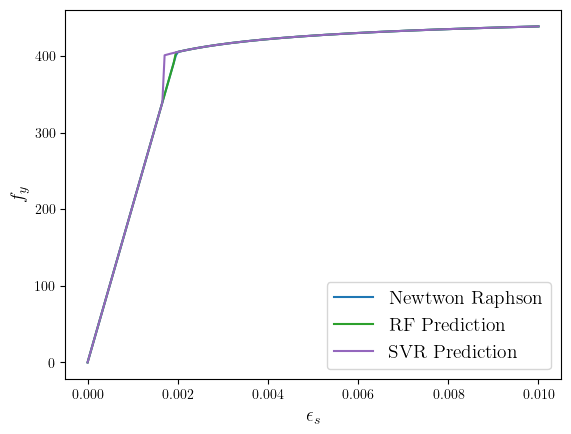

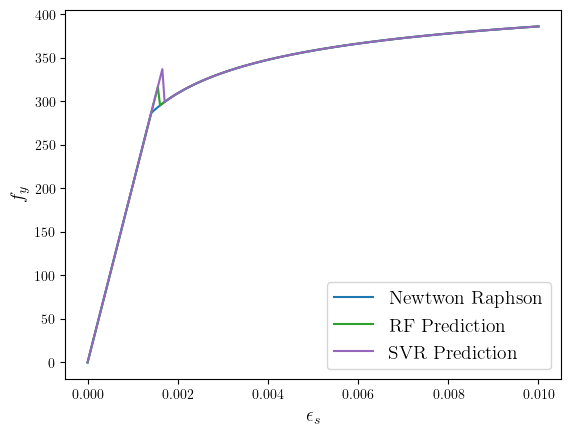

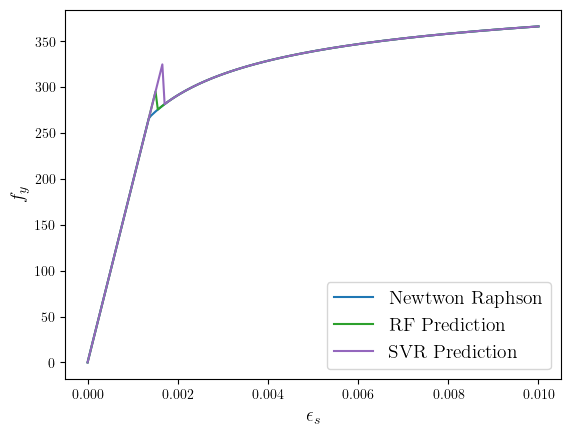

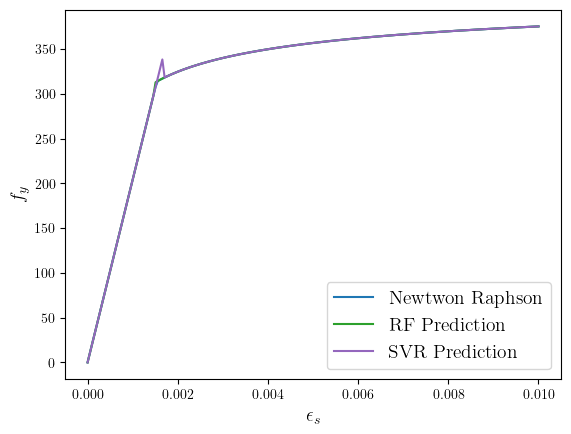

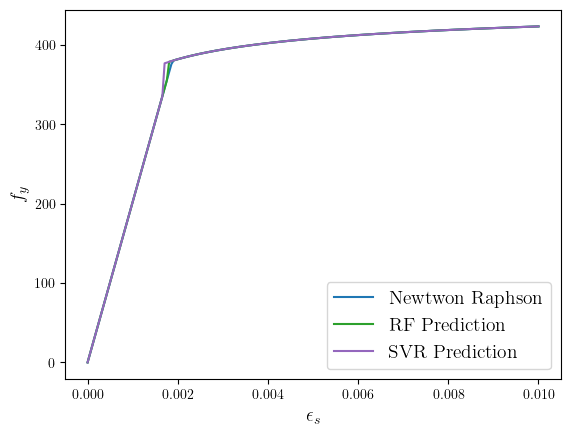

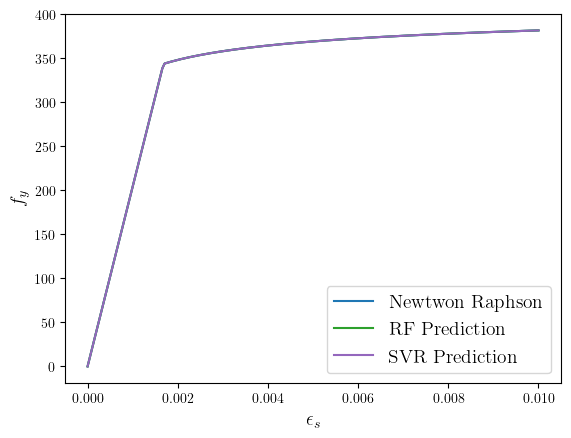

In [575]:
E_s = np.array(test_df_k.get('E_s'))
f_y = np.array(test_df_k.get('f_y'))
f_ct = np.array(test_df_k.get('f_ct'))
A_s = np.array(test_df_k.get('A_s'))
A_c = np.array(test_df_k.get('A_c'))
M = np.array(test_df_k.get('M'))
epsilon_max = np.array(test_df_k.get('true'))
epsilon_rf = np.array(test_df_k.get('rf_predict'))
epsilon_svr = np.array(test_df_k.get('svr_predict'))

epsilon_s = np.linspace(0, 0.01, 200)#np.array([i*0.0001%0.001 for i in range(1000)])

idxs = np.random.choice(np.arange(len(epsilon_max)), 10, replace=False)
print(idxs)

for idx in idxs:
    mask = epsilon_s >= epsilon_max[idx]

    sigma = np.zeros(np.shape(epsilon_max)) + E_s[idx] * epsilon_s
    sigma[mask] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask]))))

    mask_rf = epsilon_s >= epsilon_rf[idx]

    sigma_rf = np.zeros(np.shape(epsilon_rf)) + E_s[idx] * epsilon_s
    sigma_rf[mask_rf] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask_rf]))))

    mask_svr = epsilon_s >= epsilon_svr[idx]

    sigma_svr = np.zeros(np.shape(epsilon_rf)) + E_s[idx] * epsilon_s
    sigma_svr[mask_svr] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask_svr]))))

    plt.figure()
    plt.plot(epsilon_s, sigma, color='tab:blue', label = 'Newtwon Raphson')
    #plt.axvline(x=epsilon_max[idx], color = 'tab:orange',label='epsilon_max Newton Raphson')
    plt.plot(epsilon_s, sigma_rf, color='tab:green', label = 'RF Prediction')
    #plt.axvline(x=epsilon_rf[idx], color = 'tab:red', label='epsilon_max RF Prediction')
    plt.plot(epsilon_s, sigma_svr, color='tab:purple', label = 'SVR Prediction')
    #plt.axvline(x=epsilon_svr[idx], color = 'tab:brown', label='epsilon_max SVR Prediction')
    plt.ylabel('$f_y$')
    plt.xlabel('$\epsilon_s$')
    plt.legend()
    plt.show()


##### Monte-carlo sampling

In [576]:
from sklearn.kernel_approximation import RBFSampler

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_true = rbf_feature.fit_transform(np.reshape([df_k.get('true')], (1000, 1)))

# d_lr_pred =rbf_feature.transform(np.reshape([df_b.get('lr_predict')], (1000, 1))) 

# d_mlp_pred =rbf_feature.transform(np.reshape([df_b.get('mlp_predict')], (1000, 1))) 

# d_svr_pred =rbf_feature.transform(np.reshape([df_b.get('svr_predict')], (1000, 1))) 

# d_dt_pred =rbf_feature.transform(np.reshape([df_b.get('dt_predict')], (1000, 1))) 

# d_rf_pred =rbf_feature.transform(np.reshape([df_b.get('rf_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_lr_pred =rbf_feature.fit_transform(np.reshape([df_k.get('lr_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_mlp_pred =rbf_feature.fit_transform(np.reshape([df_k.get('mlp_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_svr_pred =rbf_feature.fit_transform(np.reshape([df_k.get('svr_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_dt_pred =rbf_feature.fit_transform(np.reshape([df_k.get('dt_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_rf_pred =rbf_feature.fit_transform(np.reshape([df_k.get('rf_predict')], (1000, 1))) 

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 18 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 23 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


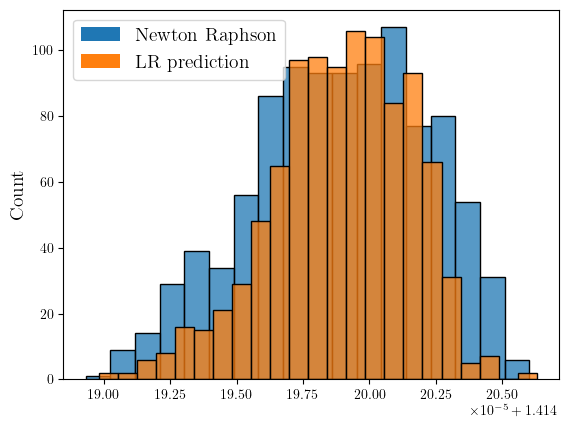

In [577]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_lr_pred).flatten(), legend=False)
plt.legend(labels = ['Newton Raphson', '_A_','LR prediction', '_A_'])
plt.savefig('./figures/kernel-montecarlo-lr.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 18 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 95 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


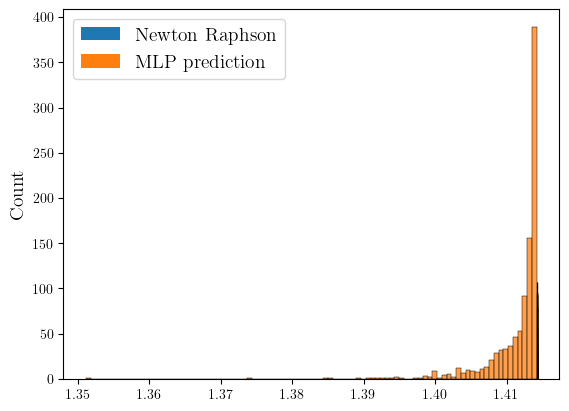

In [578]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_mlp_pred).flatten(), legend=False)
plt.legend(labels = ['Newton Raphson', '_A_','MLP prediction', '_A_'])
plt.savefig('./figures/kernel-montecarlo-mlp.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 18 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 1 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


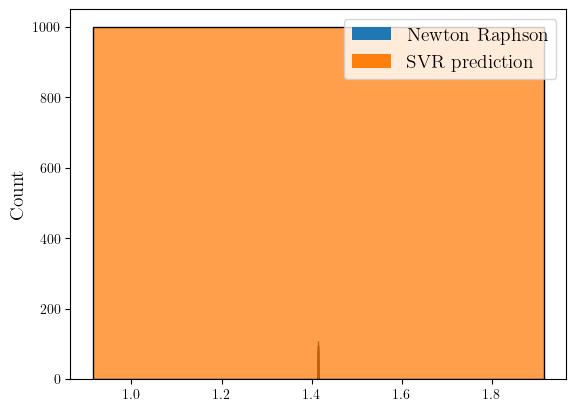

In [579]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_svr_pred).flatten(), legend=False)
plt.legend(labels = ['Newton Raphson', '_A_','SVR prediction', '_A_'])
plt.savefig('./figures/kernel-montecarlo-svr.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 18 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


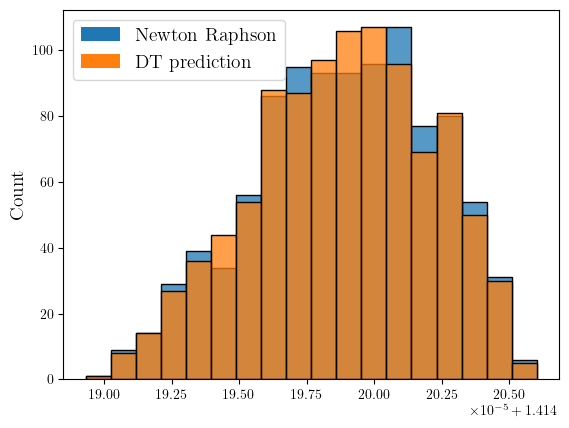

In [580]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_dt_pred).flatten(), legend=False)
plt.legend(labels = ['Newton Raphson', '_A_','DT prediction', '_A_'])
plt.savefig('./figures/kernel-montecarlo-dt.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 18 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 20 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


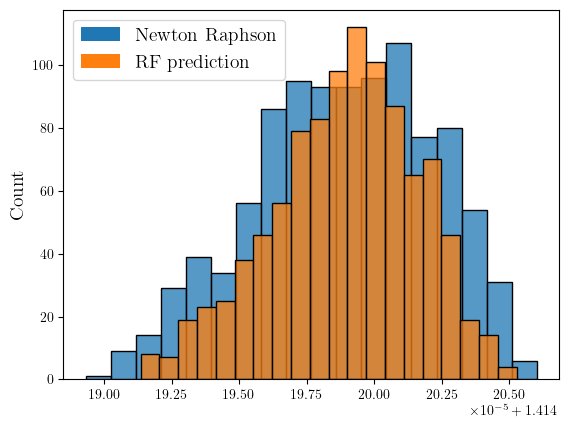

In [581]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_rf_pred).flatten(), legend=False)
plt.legend(labels = ['Newton Raphson', '_A_','RF prediction', '_A_'])
plt.savefig('./figures/kernel-montecarlo-rf.png')

### Heat map

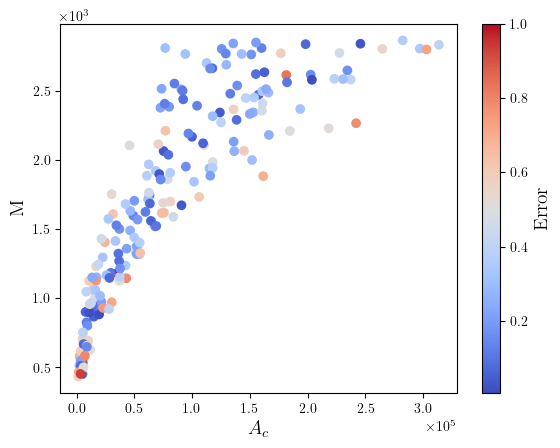

In [582]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_k)
col1 = np.abs(y_test_k - y_predict_rf_k)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-kernel-error-predictwithclass.eps',format='eps',dpi=300)
plt.show()

### Heat map

In [583]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_k)
col1 = y_test_k
col1 = col1/col1.max()
plt.show()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='RdYlBu')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"y_pred"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-kernel-real.eps',format='eps',dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

In [584]:
print(X_train_k_std.shape)
print(y_train_k.shape)

(800, 6)
(800,)


In [585]:
# # TENSORFLOW
# def build_model():
#     model = keras.Sequential([
#         layers.Conv1D(16, 1, input_shape=[X_train_b_std.shape[1],1]),
#         layers.Conv1D(8, 1),
#         layers.Conv1D(4, 1),
#         #layers.Dense(32, activation='relu', input_shape=[X_train_b_std.shape[1]]),
#         #layers.Dropout(0.1),
#         #layers.Dense(16, activation='relu'),
#         #layers.Dropout(0.1),
#         layers.Flatten(),
#         layers.Dense(4, activation='relu'),
#         #layers.Dropout(0.1),
#         layers.Dense(1, activation='linear')
#     ])

#     optimizer = tf.keras.optimizers.Adam(0.001)

#     model.compile(loss='mse',
#         optimizer=optimizer,
#         metrics=['mae', 'mse'])
#     return model


# model = build_model()
# model.summary()

# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [Strain]')
#     plt.plot(hist['epoch'], hist['mae'])
#     plt.ylabel('Mean Square Error [$Strain^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
#     plt.legend()
#     plt.show()


# #early_stop = keras.callbacks.EarlyStopping(monitor='val_mae', patience=15, min_delta=1e-10)


# history = model.fit(X_train_b_std, y_train_b, epochs=1000, validation_split = 0.2, verbose=1)

# plot_history(history)

# test_predictions = model.predict(X_test_b_b_std).flatten()

# print(test_predictions.shape)
# print(y_test_b.shape)

# plt.scatter(y_test_b, test_predictions)
# plt.xlabel('True Values [Strain]')
# plt.ylabel('Predictions [Strain]')
# plt.axis('equal')
# plt.axis('square')
# plt.xlim([0,plt.xlim()[1]])
# plt.ylim([0,plt.ylim()[1]])
# _ = plt.plot([-100, 100], [-100, 100])
# plt.show()

# error = test_predictions - y_test_b
# plt.hist(error, bins = 25)
# plt.xlabel("Prediction Error [Strain]")
# _ = plt.ylabel("Count")
# plt.show()

# rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_b, test_predictions))
# mae_mlp = metrics.mean_absolute_error(y_test_b, test_predictions)
# r2_mlp = r2_score(y_test_b, test_predictions)
# mape_mlp = mean_absolute_percentage_error(y_test_b, test_predictions)

# print(f'RSME: {rmse_mlp} \n MAE: {mae_mlp} \n R2: {r2_mlp} \n MAPE: {mape_mlp} \n')

### TENSORFLOW
def build_model():
    model = keras.Sequential([
        layers.Dense(32, activation='relu', input_shape=[X_train_kb_std.shape[1]]),
        layers.Dropout(0.1),
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(8, activation='relu'),
        layers.Dropout(0.1),
        layers.Dense(1, activation='linear')
    ])

    optimizer = tf.keras.optimizers.Adam(0.001)

    model.compile(loss='mse',
        optimizer=optimizer,
        metrics=['mae', 'mse'])
    return model


model = build_model()
model.summary()

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [Strain]')
    plt.plot(hist['epoch'], hist['mae'])
    plt.ylabel('Mean Square Error [$Strain^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
    plt.show()


#early_stop = keras.callbacks.EarlyStopping(monitor='val_mae', patience=15, min_delta=1e-10)


history = model.fit(X_train_kb_std, y_train_kb, epochs=1000, validation_split = 0.2, verbose=1)

plot_history(history)

test_predictions = model.predict(X_test_kb_std).flatten()

plt.scatter(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])
plt.xlabel('True Values [Strain]')
plt.ylabel('Predictions [Strain]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

error = test_predictions[y_test_class==1] - y_test_kb[y_test_class==1]
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Strain]")
_ = plt.ylabel("Count")
plt.show()

rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], test_predictions[y_test_class==1]))
mae_mlp = metrics.mean_absolute_error(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])
r2_mlp = r2_score(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])
mape_mlp = mean_absolute_percentage_error(y_test_kb[y_test_class==1], test_predictions[y_test_class==1])

print(f'RMSE: {rmse_mlp} \n MAE: {mae_mlp} \n R2: {r2_mlp} \n MAPE: {mape_mlp} \n')

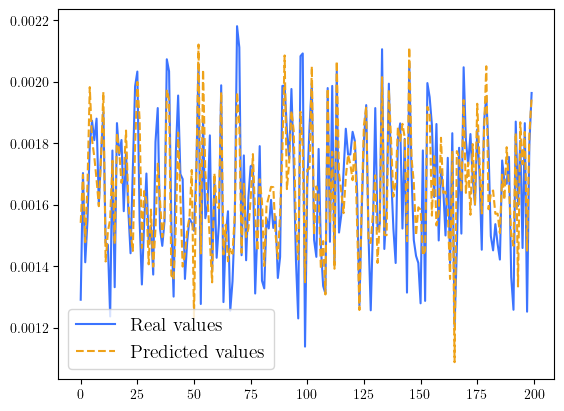

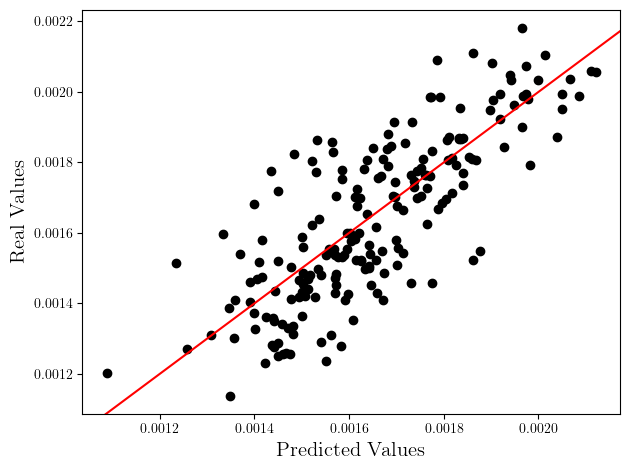

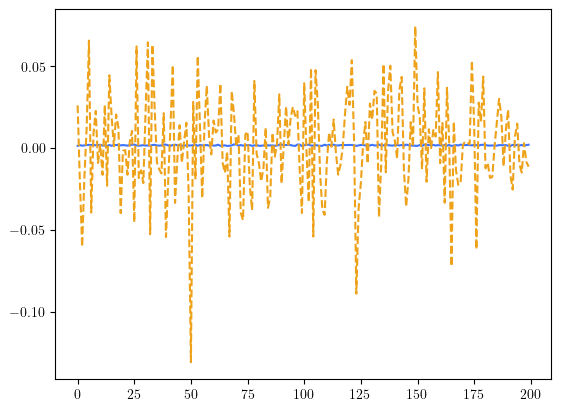

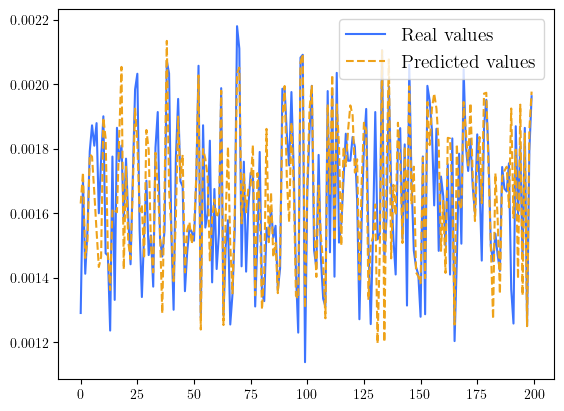

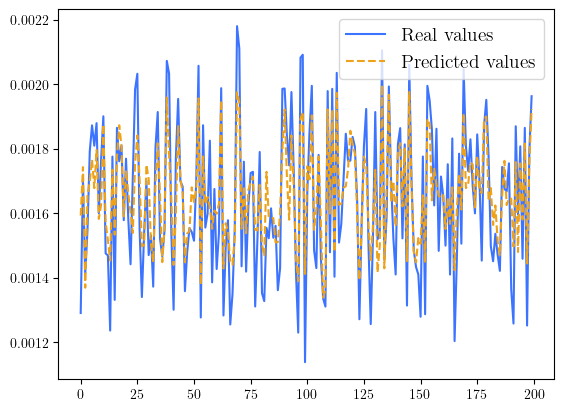

In [586]:
pretty_blue = '#3C74FF'
nice_orange = '#EEA219'

x=np.arange(0,len(y_test_k),1)

fig1_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_lr_k, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig_true_predict_k, ax = plt.subplots()
plt.plot(y_predict_lr_k, y_test_k, 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/kernel-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

fig2_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_mlp_k, '--', color=nice_orange, label='Predicted values')

fig3_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_svr_k, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_dt_k, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig5_k = plt.figure()
plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_rf_k, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

#fig6_k = plt.figure()
#plt.plot(x,y_test_k, '-', color=pretty_blue, label='Real values')
#plt.plot(x,test_predictions, '--', color=nice_orange, label='Predicted values')
#plt.legend()
#plt.show()


### Kernel --> Bound

In [587]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [588]:
lr = LinearRegression()
lr.fit(X_train_k_std, y_train_k)
y_predict_lr_k = lr.predict(X_test_k_b_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_k_std, y_train_k)
y_predict_svr_k = svr.predict(X_test_k_b_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_k_std, y_train_k)
    y_predict_dt_k = dt.predict(X_test_k_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_dt_k)
    mse = metrics.mean_squared_error(y_test_b, y_predict_dt_k)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_k_std, y_train_k)
    y_predict_rf_k = rf.predict(X_test_k_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_rf_k)
    mse = metrics.mean_squared_error(y_test_b, y_predict_rf_k)
    mae_rf.append(mae)
    mse_rf.append(mse)  

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_lr_k))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_svr_k))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_dt_k))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_rf_k))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )



 0.00033201005920294543 
 0.00047817125366872107 
 7.212610224794906e-08 
 9.100010415212996e-08 



## Testing the Bound

### Bound --> Bound

In [589]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel_bound_forKernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
#y_test_k = data_k_test.values[:, -1]

#### Regression models

In [590]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

mlp = MLPRegressor(learning_rate='adaptive')
mlp.fit(X_train_b_std, y_train_b)
y_predict_mlp_b = mlp.predict(X_test_b_b_std)

lr = LinearRegression()
lr.fit(X_train_b_std, y_train_b)
y_predict_lr_b = lr.predict(X_test_b_b_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_b_std, y_train_b)
y_predict_svr_b = svr.predict(X_test_b_b_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
rmse_dt = []
r2_dt = []
mape_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_b_std, y_train_b)
    y_predict_dt_b = dt.predict(X_test_b_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_dt_b)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_dt_b))
    r2 = r2_score(y_test_b, y_predict_dt_b)
    mape = mean_absolute_percentage_error(y_test_b, y_predict_dt_b)
    mae_dt.append(mae)
    rmse_dt.append(rmse)
    r2_dt.append(r2)
    mape_dt.append(mape)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

mae_rf = []
rmse_rf = []
r2_rf = []
mape_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_b_std, y_train_b)
    y_predict_rf_b = rf.predict(X_test_b_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_rf_b)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_rf_b))
    r2 = r2_score(y_test_b, y_predict_rf_b)
    mape = mean_absolute_percentage_error(y_test_b, y_predict_rf_b)
    mae_rf.append(mae)
    rmse_rf.append(rmse)
    r2_rf.append(r2)
    mape_rf.append(mape)
    # plt.plot(y_test_k)
    # plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_lr_b))
rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_mlp_b))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_svr_b))
rmse_dt = np.mean(rmse_dt)
rmse_rf = np.mean(rmse_rf)
mae_lr = metrics.mean_absolute_error(y_test_b, y_predict_lr_b)
mae_mlp = metrics.mean_absolute_error(y_test_b, y_predict_mlp_b)
mae_svr = metrics.mean_absolute_error(y_test_b, y_predict_svr_b)
mae_dt = np.mean(mae_dt)
mae_rf = np.mean(mae_rf)
r2_lr = r2_score(y_test_b, y_predict_lr_b)
r2_mlp = r2_score(y_test_b, y_predict_mlp_b)
r2_svr = r2_score(y_test_b, y_predict_svr_b)
r2_dt = np.mean(r2_dt)
r2_rf = np.mean(r2_rf)
mape_lr = mean_absolute_percentage_error(y_test_b, y_predict_svr_b)
mape_mlp = mean_absolute_percentage_error(y_test_b, y_predict_mlp_b)
mape_svr = mean_absolute_percentage_error(y_test_b, y_predict_svr_b)
mape_dt = np.mean(mape_dt)
mape_rf = np.mean(mape_rf)

print('Root Mean Squared Error:''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error:''\n', 'LR: ''\t', mae_lr, '\n', 'MLP: ''\t', mae_mlp, '\n', 'SVR: ''\t', mae_svr, '\n', 'DT: ''\t', mae_dt, '\n', 'RF: ''\t', mae_rf, '\n', )
print('R2 Score:''\n', 'LR: ''\t', r2_lr, '\n', 'MLP: ''\t', r2_mlp, '\n', 'SVR: ''\t', r2_svr, '\n', 'DT: ''\t', r2_dt, '\n', 'RF: ''\t', r2_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_lr, '\n', 'MLP: ''\t', mape_mlp, '\n', 'SVR: ''\t', mape_svr, '\n', 'DT: ''\t', mape_dt, '\n', 'RF: ''\t', mape_rf, '\n', )

Root Mean Squared Error:
 LR: 	 4.283322697511918e-06 
 MLP: 	 0.038436442301701255 
 SVR: 	 9.306982381880737e-05 
 DT: 	 1.590914853309151e-05 
 RF: 	 9.34036418094386e-06 

Mean Absolute Error:
 LR: 	 3.2185241068670998e-06 
 MLP: 	 0.030036531788115498 
 SVR: 	 7.793944973924239e-05 
 DT: 	 1.2436412074646897e-05 
 RF: 	 7.15134415257438e-06 

R2 Score:
 LR: 	 0.9978773417979453 
 MLP: 	 -170923.70683155552 
 SVR: 	 -0.0021581498192020376 
 DT: 	 0.9707068155971215 
 RF: 	 0.9899053717081834 

MAPE Score:
 LR: 	 0.06503758578828393 
 MLP: 	 25.01086790804352 
 SVR: 	 0.06503758578828393 
 DT: 	 0.010433640656388032 
 RF: 	 0.0059769272197362 



#### ML vs True comparison

In [591]:
test_df_b = X_test_b.copy()
test_df_b = test_df_b.rename(columns={0:'E_s',1:'f_y',2:'f_ct',3:'A_s',4:'A_c',5:'M'})
test_df_b.insert(len(test_df_b.columns), 'true', y_test_b)
test_df_b.insert(len(test_df_b.columns), 'lr_predict', y_predict_lr_b)
test_df_b.insert(len(test_df_b.columns), 'mlp_predict', y_predict_mlp_b)
test_df_b.insert(len(test_df_b.columns), 'svr_predict', y_predict_svr_b)
test_df_b.insert(len(test_df_b.columns), 'dt_predict', y_predict_dt_b)
test_df_b.insert(len(test_df_b.columns), 'rf_predict', y_predict_rf_b)
test_df_b

E_s         f_y      f_ct          A_s            A_c  \
820  199855.036189  493.521676  2.709319    58.342992   17410.155517   
160  198881.305756  457.336353  2.735651   970.557937  399572.250100   
346  195454.029887  416.309236  2.989675   697.576952  220218.112453   
661  195442.852599  448.950094  2.846506   454.370899  155185.589794   
864  204902.739990  466.229706  3.500928   227.175139   58585.190465   
..             ...         ...       ...          ...            ...   
128  202024.932028  440.333542  3.574120  1242.679295  386421.169103   
367  196396.951747  491.954085  2.974336   427.187150  155826.802565   
547  196674.092214  484.190134  2.760539  1016.761571  453558.155240   
990  195816.758946  407.131834  3.609713   814.492697  212036.626855   
813  203584.520367  405.139410  3.196126  1137.459383  347111.740133   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
820   617.279782  0.001258    0.001262     0.061163     0.001199    0.001276   
160  2517.667869  0.001267    0.001270     0.058281     0.001199    0.001250   
346  2134.439091  0.001161    0.001167     0.006735     0.001199    0.001163   
661  1722.633779  0.001243    0.001245    -0.062307     0.001199    0.001241   
864  1218.058385  0.001208    0.001205     0.018459     0.001199    0.001201   
..           ...       ...         ...          ...          ...         ...   
128  2848.834604  0.001205    0.001197    -0.000876     0.001199    0.001213   
367  1670.308899  0.001360    0.001358    -0.081669     0.001199    0.001363   
547  2576.898226  0.001362    0.001361     0.014397     0.001199    0.001339   
990  2306.382330  0.001136    0.001141     0.030443     0.001199    0.001129   
813  2725.559414  0.001094    0.001089    -0.061827     0.001199    0.001081   

     rf_predict  
820    0.001260  
160    0.001264  
346    0.001156  
661    0.001232  
864    0.001217  
..          ...  
128    0.001206  
367    0.001357  
547    0.001353  
990    0.001131  
813    0.001092  

[200 rows x 12 columns]

In [592]:
train_df_b = X_train_b.copy()
train_df_b = train_df_b.rename(columns={0:'E_s',1:'f_y',2:'f_ct',3:'A_s',4:'A_c',5:'M'})
train_df_b.insert(len(train_df_b.columns), 'true', y_train_b)
train_df_b.insert(len(train_df_b.columns), 'lr_predict', lr.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'mlp_predict', mlp.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'svr_predict', svr.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'dt_predict', dt.predict(X_train_b_std))
train_df_b.insert(len(train_df_b.columns), 'rf_predict', rf.predict(X_train_b_std))
train_df_b

E_s         f_y      f_ct          A_s            A_c  \
747  195525.117600  476.342490  2.611089   971.635348  445546.072947   
535  202718.974570  448.693303  3.190420    75.824091   17566.924264   
558  197981.151105  450.486142  3.026594   243.995528   71091.731609   
945  199541.016429  492.334673  2.673922  1188.407387  572678.445349   
313  201368.772870  436.978609  3.872090  1220.303979  345942.491301   
..             ...         ...       ...          ...            ...   
207  196799.039537  494.430977  3.592940    59.342771   13467.240487   
269  203083.148573  452.942102  3.885304  1019.406818  292046.649574   
94   196918.706796  406.834740  3.913875  1129.292998  285936.121671   
567  203828.462934  478.119782  3.990944   933.673819  275505.971956   
462  201279.966056  414.047028  3.228566   648.125385  184005.601038   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
747  2519.064906  0.001346    0.001346     0.057551     0.001199    0.001346   
535   703.706094  0.001130    0.001127    -0.040629     0.001199    0.001130   
558  1262.346669  0.001210    0.001207    -0.012515     0.001199    0.001210   
945  2785.931130  0.001370    0.001368     0.027520     0.001199    0.001370   
313  2823.070465  0.001199    0.001191     0.057584     0.001199    0.001199   
..           ...       ...         ...          ...          ...         ...   
207   622.546242  0.001283    0.001286     0.014958     0.001199    0.001283   
269  2580.248128  0.001229    0.001227     0.019807     0.001199    0.001229   
94   2715.757718  0.001137    0.001135    -0.018821     0.001199    0.001137   
567  2469.365039  0.001293    0.001293     0.005373     0.001199    0.001293   
462  2057.392823  0.001117    0.001121     0.002855     0.001199    0.001117   

     rf_predict  
747    0.001340  
535    0.001131  
558    0.001213  
945    0.001367  
313    0.001198  
..          ...  
207    0.001271  
269    0.001229  
94     0.001134  
567    0.001293  
462    0.001116  

[800 rows x 12 columns]

In [593]:
df_b = pd.concat([train_df_b, test_df_b], ignore_index=True, axis=0)
df_b.to_csv(f'./data/boundary{n_bound}-with-predictions.csv', index=False)
df_b

E_s         f_y      f_ct          A_s            A_c  \
0    195525.117600  476.342490  2.611089   971.635348  445546.072947   
1    202718.974570  448.693303  3.190420    75.824091   17566.924264   
2    197981.151105  450.486142  3.026594   243.995528   71091.731609   
3    199541.016429  492.334673  2.673922  1188.407387  572678.445349   
4    201368.772870  436.978609  3.872090  1220.303979  345942.491301   
..             ...         ...       ...          ...            ...   
995  202024.932028  440.333542  3.574120  1242.679295  386421.169103   
996  196396.951747  491.954085  2.974336   427.187150  155826.802565   
997  196674.092214  484.190134  2.760539  1016.761571  453558.155240   
998  195816.758946  407.131834  3.609713   814.492697  212036.626855   
999  203584.520367  405.139410  3.196126  1137.459383  347111.740133   

               M      true  lr_predict  mlp_predict  svr_predict  dt_predict  \
0    2519.064906  0.001346    0.001346     0.057551     0.001199    0.001346   
1     703.706094  0.001130    0.001127    -0.040629     0.001199    0.001130   
2    1262.346669  0.001210    0.001207    -0.012515     0.001199    0.001210   
3    2785.931130  0.001370    0.001368     0.027520     0.001199    0.001370   
4    2823.070465  0.001199    0.001191     0.057584     0.001199    0.001199   
..           ...       ...         ...          ...          ...         ...   
995  2848.834604  0.001205    0.001197    -0.000876     0.001199    0.001213   
996  1670.308899  0.001360    0.001358    -0.081669     0.001199    0.001363   
997  2576.898226  0.001362    0.001361     0.014397     0.001199    0.001339   
998  2306.382330  0.001136    0.001141     0.030443     0.001199    0.001129   
999  2725.559414  0.001094    0.001089    -0.061827     0.001199    0.001081   

     rf_predict  
0      0.001340  
1      0.001131  
2      0.001213  
3      0.001367  
4      0.001198  
..          ...  
995    0.001206  
996    0.001357  
997    0.001353  
998    0.001131  
999    0.001092  

[1000 rows x 12 columns]

##### Eq 1

[197  83   8 131  34 169   2  31  42  16]


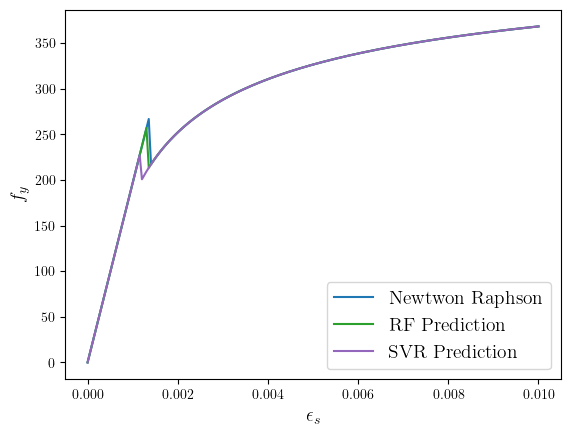

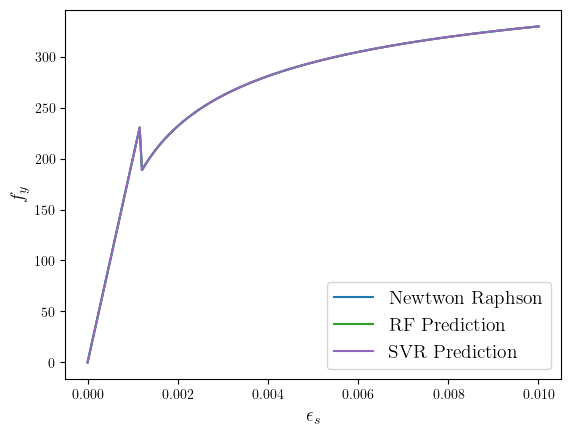

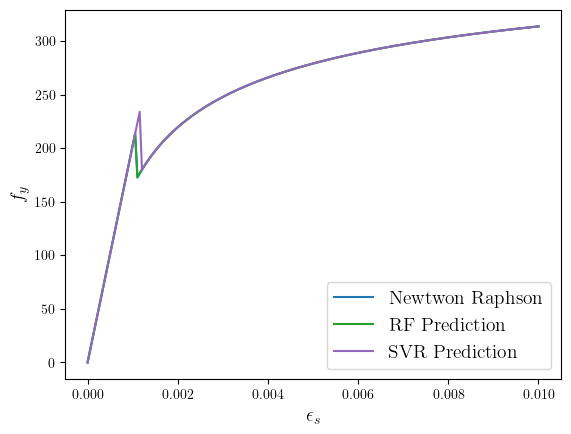

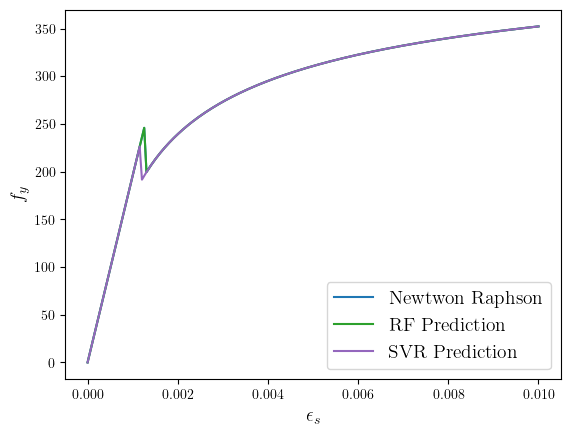

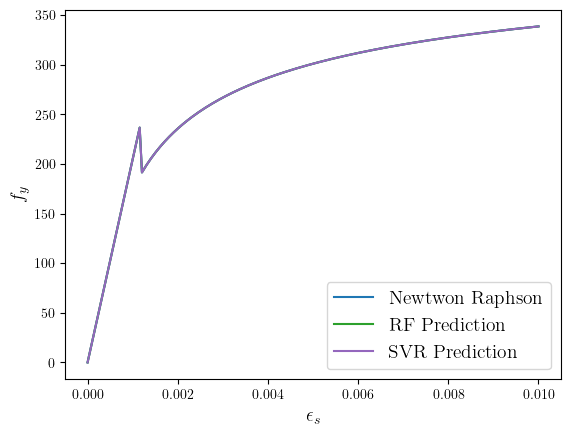

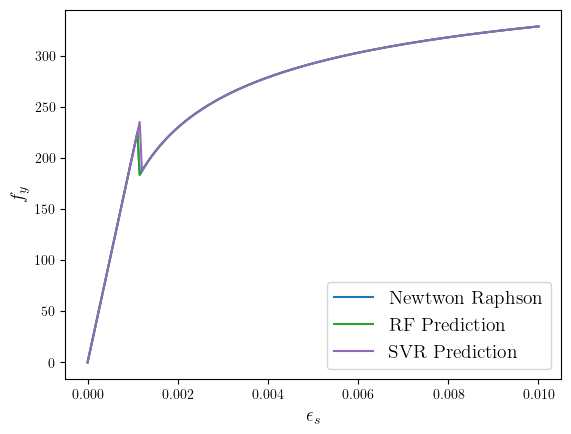

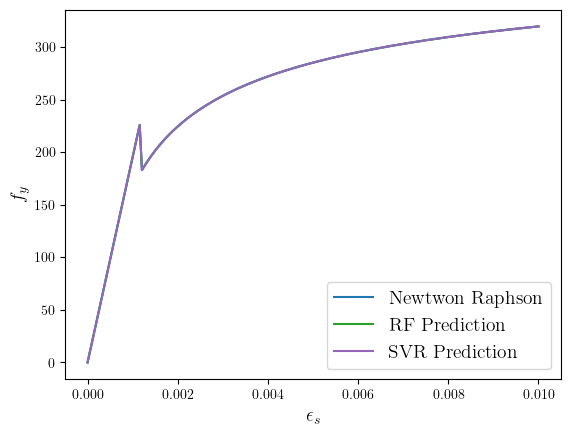

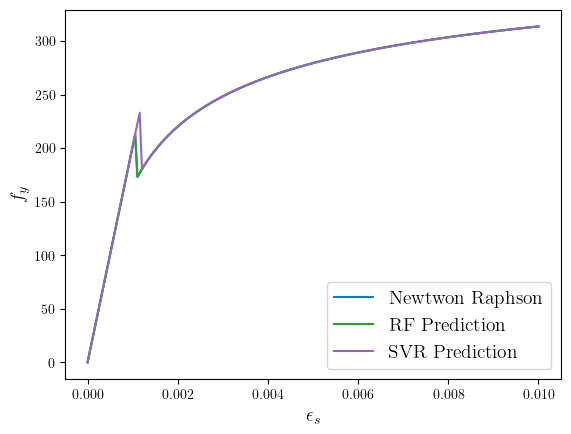

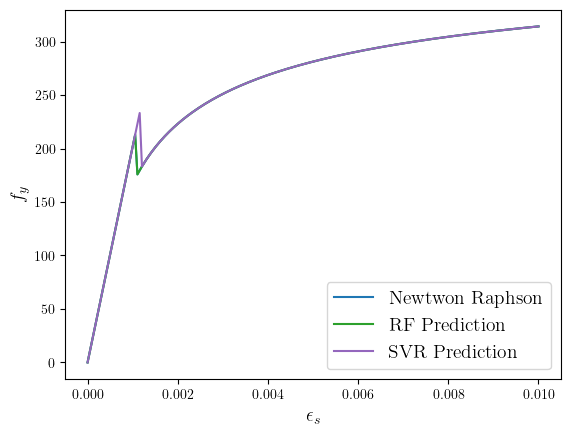

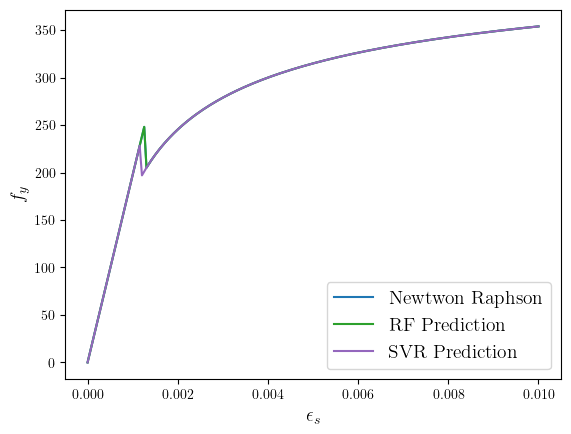

In [594]:
E_s = np.array(test_df_b.get('E_s'))
f_y = np.array(test_df_b.get('f_y'))
f_ct = np.array(test_df_b.get('f_ct'))
A_s = np.array(test_df_b.get('A_s'))
A_c = np.array(test_df_b.get('A_c'))
M = np.array(test_df_b.get('M'))
epsilon_max = np.array(test_df_b.get('true'))
epsilon_rf = np.array(test_df_b.get('rf_predict'))
epsilon_svr = np.array(test_df_b.get('svr_predict'))

epsilon_s = np.linspace(0, 0.01, 200)#np.array([i*0.0001%0.001 for i in range(1000)])

idxs = np.random.choice(np.arange(len(epsilon_max)), 10, replace=False)
print(idxs)

for idx in idxs:
    mask = epsilon_s >= epsilon_max[idx]

    sigma = np.zeros(np.shape(epsilon_max)) + E_s[idx] * epsilon_s
    sigma[mask] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask]))))

    mask_rf = epsilon_s >= epsilon_rf[idx]

    sigma_rf = np.zeros(np.shape(epsilon_rf)) + E_s[idx] * epsilon_s
    sigma_rf[mask_rf] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask_rf]))))

    mask_svr = epsilon_s >= epsilon_svr[idx]

    sigma_svr = np.zeros(np.shape(epsilon_rf)) + E_s[idx] * epsilon_s
    sigma_svr[mask_svr] = f_y[idx] - ((A_c[idx] * f_ct [idx])/(A_s[idx] * (1 + np.sqrt(3.6 * M[idx] * epsilon_s[mask_svr]))))

    plt.figure()
    plt.plot(epsilon_s, sigma, color='tab:blue', label = 'Newtwon Raphson')
    #plt.axvline(x=epsilon_max[idx], color = 'tab:orange',label='epsilon_max Newton Raphson')
    plt.plot(epsilon_s, sigma_rf, color='tab:green', label = 'RF Prediction')
    #plt.axvline(x=epsilon_rf[idx], color = 'tab:red', label='epsilon_max RF Prediction')
    plt.plot(epsilon_s, sigma_svr, color='tab:purple', label = 'SVR Prediction')
    #plt.axvline(x=epsilon_svr[idx], color = 'tab:brown', label='epsilon_max SVR Prediction')
    plt.ylabel('$f_y$')
    plt.xlabel('$\epsilon_s$')
    plt.legend()
    plt.show()


##### Monte-carlo sampling

In [595]:
from sklearn.kernel_approximation import RBFSampler

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_true = rbf_feature.fit_transform(np.reshape([df_b.get('true')], (1000, 1)))

# d_lr_pred =rbf_feature.transform(np.reshape([df_b.get('lr_predict')], (1000, 1))) 

# d_mlp_pred =rbf_feature.transform(np.reshape([df_b.get('mlp_predict')], (1000, 1))) 

# d_svr_pred =rbf_feature.transform(np.reshape([df_b.get('svr_predict')], (1000, 1))) 

# d_dt_pred =rbf_feature.transform(np.reshape([df_b.get('dt_predict')], (1000, 1))) 

# d_rf_pred =rbf_feature.transform(np.reshape([df_b.get('rf_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_lr_pred =rbf_feature.fit_transform(np.reshape([df_b.get('lr_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_mlp_pred =rbf_feature.fit_transform(np.reshape([df_b.get('mlp_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_svr_pred =rbf_feature.fit_transform(np.reshape([df_b.get('svr_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_dt_pred =rbf_feature.fit_transform(np.reshape([df_b.get('dt_predict')], (1000, 1))) 

rbf_feature = RBFSampler(gamma = 1, random_state = 1, n_components=1)
d_rf_pred =rbf_feature.fit_transform(np.reshape([df_b.get('rf_predict')], (1000, 1))) 

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 16 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 15 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


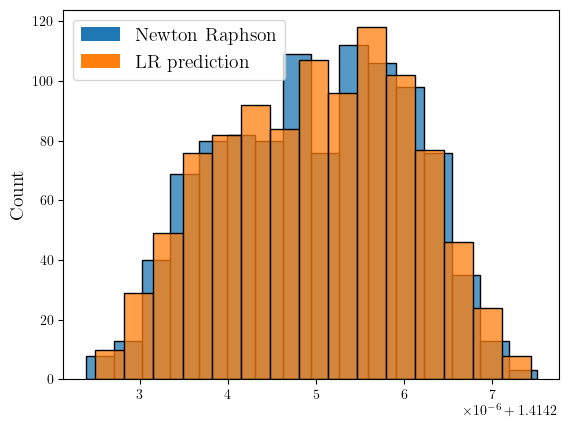

In [596]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_lr_pred).flatten(), legend=False)
plt.legend(labels = ['Newton Raphson', '_A_','LR prediction', '_A_'])
plt.savefig('./figures/bound-montecarlo-lr.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 16 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 67 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


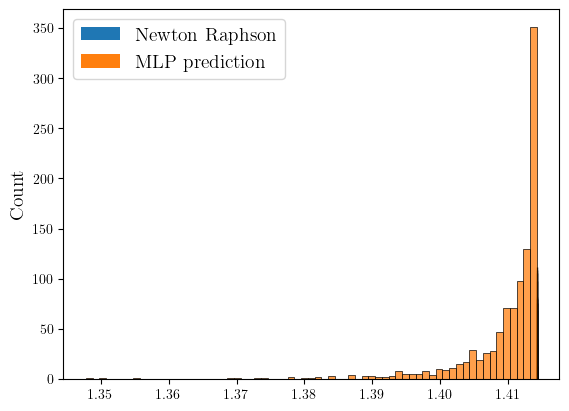

In [597]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_mlp_pred).flatten(), legend=False)
plt.legend(labels = ['Newton Raphson', '_A_','MLP prediction', '_A_'])
plt.savefig('./figures/bound-montecarlo-mlp.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 16 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 1 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


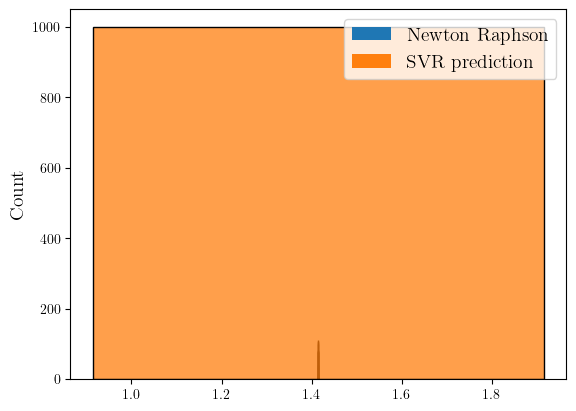

In [598]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_svr_pred).flatten(), legend=False)
plt.legend(labels = ['Newton Raphson', '_A_','SVR prediction', '_A_'])
plt.savefig('./figures/bound-montecarlo-svr.png')

In [599]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_dt_pred).flatten(), legend=False)
plt.legend(labels = ['Newton Raphson', '_A_','DT prediction', '_A_'])
plt.savefig('./figures/bound-montecarlo-dt.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 16 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 15 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


In [600]:
sns.histplot(np.array(d_true).flatten(), legend=False)
sns.histplot(np.array(d_rf_pred).flatten(), legend=False)
plt.legend(labels = ['Newton Raphson', '_A_','RF prediction', '_A_'])
plt.savefig('./figures/bound-montecarlo-rf.png')

/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 16 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/cosmin/anaconda3/envs/CFGRIB/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The handle <BarContainer object of 14 artists> has a label of '_A_' which cannot be automatically added to the legend.
  This is separate from the ipykernel package so we can avoid doing imports until


### Heat map

In [601]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_b)
col1 = np.abs(y_test_b - y_predict_lr_b)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-bound-error-predictwithclass.eps',format='eps',dpi=300)
plt.show()

In [602]:
#X_test_heatmap_b = pd.DataFrame(X_test_b)
#X_test_heatmap_b = X_test_heatmap_b.assign(A = y_predict_lr_b)
#X_test_heatmap_b = X_test_heatmap_b.drop(columns=[0,1,2,5])
#X_test_heatmap_b.to_csv("predict-bound.csv",index=False, header=False)

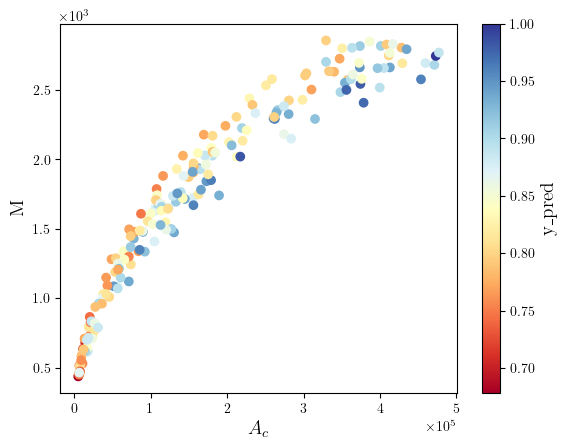

In [603]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_b)
col2 = y_test_b
col2 = col2/col2.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col2, cmap='RdYlBu')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"y_pred"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-bound-real.eps',format='eps',dpi=300)
plt.show()

In [604]:
col_bool = col1 == col2
col_bool[col_bool==True]

Series([], Name: 6, dtype: bool)

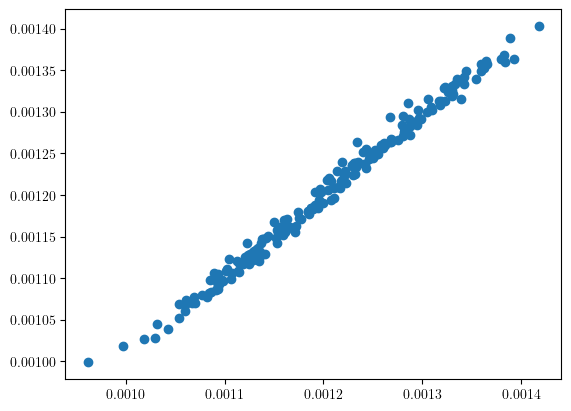

In [605]:
figsct_b1 = plt.figure()
plt.scatter(y_test_b, y_predict_rf_b)


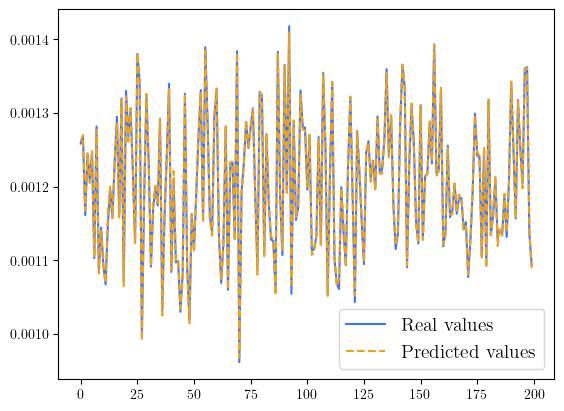

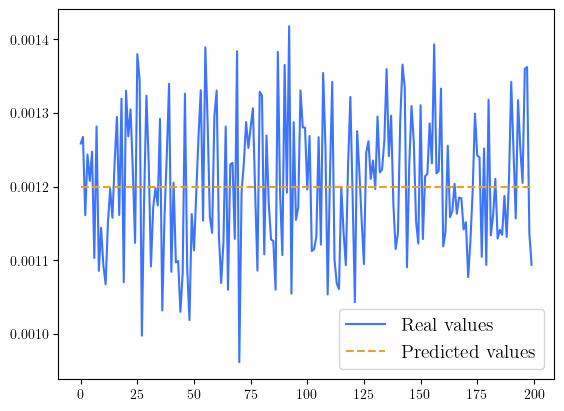

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


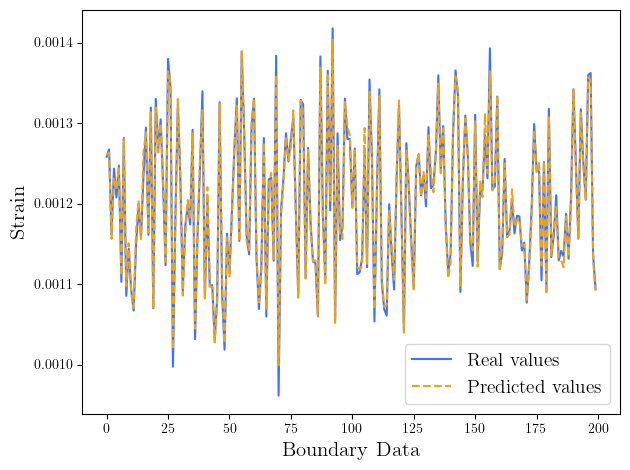

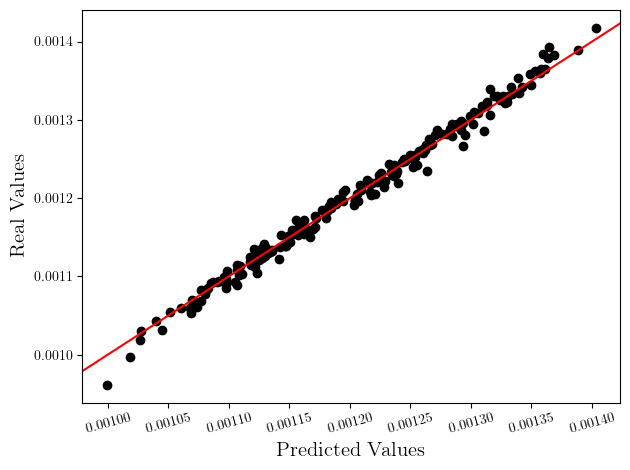

In [606]:
x=np.arange(0,len(y_test_b),1)

fig1_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_lr_b, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig2_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_svr_b, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig3_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_dt_b, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4_b = plt.figure()
plt.plot(x,y_test_b, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_rf_b, '--', color=nice_orange, label='Predicted values')
plt.xlabel('Boundary Data', fontsize=15)
plt.ylabel('Strain', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/bound-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/bound-regression.svg')
plt.show()

fig_true_predict_b, ax = plt.subplots()
plt.plot(y_predict_rf_b, y_test_b, 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig('./figures/bound-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

### Bound --> Kernel

In [607]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [608]:
lr = LinearRegression()
lr.fit(X_train_b_std, y_train_b)
y_predict_lr_b = lr.predict(X_test_b_k_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_b_std, y_train_b)
y_predict_svr_b = svr.predict(X_test_b_k_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_b_std, y_train_b)
    y_predict_dt_b = dt.predict(X_test_b_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_dt_b)
    mse = metrics.mean_squared_error(y_test_k, y_predict_dt_b)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_b_std, y_train_b)
    y_predict_rf_b = rf.predict(X_test_b_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_rf_b)
    mse = metrics.mean_squared_error(y_test_k, y_predict_rf_b)
    mae_rf.append(mae)
    mse_rf.append(mse)  

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_lr_b))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_svr_b))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_dt_b))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_rf_b))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )





 0.0004953667136169705 
 0.0005004353481097274 
 2.491127268714961e-07 
 2.510256154455345e-07 



## Testing the Kernel + Bound

### Kernel + Bound --> Kernel

In [609]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel_bound_forKernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#### Regression models

In [610]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics

lr = LinearRegression()
lr.fit(X_train_kb_std, y_train_kb)
y_predict_lr_kb = lr.predict(X_test_kb_k_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_kb_std, y_train_kb)
y_predict_svr_kb = svr.predict(X_test_kb_k_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_kb_std, y_train_kb)
    y_predict_dt_kb = dt.predict(X_test_kb_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_dt_kb)
    mse = metrics.mean_squared_error(y_test_k, y_predict_dt_kb)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_kb_std, y_train_kb)
    y_predict_rf_kb = rf.predict(X_test_kb_k_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_k, y_predict_rf_kb)
    mse = metrics.mean_squared_error(y_test_k, y_predict_rf_kb)
    mae_rf.append(mae)
    mse_rf.append(mse)
    # plt.plot(y_test_k)
    # plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_lr_kb))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_svr_kb))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_dt_k))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_k, y_predict_rf_k))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )
#print(mse_dt, mse_rf)


 0.0002099592233957443 
 0.00023335514318248998 
 2.745745637827246e-08 
 8.591871114051442e-09 



### Kernel + Bound --> Bound

In [611]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [612]:
lr = LinearRegression()
lr.fit(X_train_kb_std, y_train_kb)
y_predict_lr_kb = lr.predict(X_test_kb_b_std)
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_kb_std, y_train_kb)
y_predict_svr_kb = svr.predict(X_test_kb_b_std)
# plt.plot(y_predict_svr_k)

mae_dt = []
mse_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_kb_std, y_train_kb)
    y_predict_dt_kb = dt.predict(X_test_kb_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_dt_kb)
    mse = metrics.mean_squared_error(y_test_b, y_predict_dt_kb)
    mae_dt.append(mae)
    mse_dt.append(mse)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
mse_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_kb_std, y_train_kb)
    y_predict_rf_kb = rf.predict(X_test_kb_b_std)
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_b, y_predict_rf_kb)
    mse = metrics.mean_squared_error(y_test_b, y_predict_rf_kb)
    mae_rf.append(mae)
    mse_rf.append(mse)  

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_lr_kb))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_svr_kb))
#rmse_dt = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_dt_k))
#rmse_rf = np.sqrt(metrics.mean_squared_error(y_test_b, y_predict_rf_k))
rmse_dt = np.mean(mse_dt)
rmse_rf = np.mean(mse_rf)
print('\n', rmse_lr, '\n', rmse_svr, '\n', rmse_dt, '\n', rmse_rf, '\n', )



 0.0001574144347037993 
 0.000420615407418542 
 5.52196411838338e-09 
 2.2743848968351826e-09 



### Kernel + Bound --> Kernel + Bound

In [613]:
#Kernel data
#Train data
#data_k_train = pd.read_excel('train_kernel.xlsx') #this data contains samples from kernel (80%) and whole bound
#X_train_k = data_k_train.values[:, :-1]
#y_train_k = data_k_train.values[:, -1]
#Test data
#data_k_test = pd.read_excel('test_kernel.xlsx')
#X_test_k = data_k_test.values[:, :-1]
#y_test_k = data_k_test.values[:, -1]

#std = StandardScaler()
#X_train_k_std = std.fit_transform(X_train_k, y_train_k)
#X_test_k_std = std.transform(X_test_k)

#### Regression Models

In [614]:
mlp = MLPRegressor(learning_rate='adaptive')
mlp.fit(X_train_kb_std, y_train_kb)
y_predict_mlp_kb = mlp.predict(X_test_kb_std)
y_predict_mlp_kernel = y_predict_mlp_kb[y_test_class==0]
y_predict_mlp_bound = y_predict_mlp_kb[y_test_class==1]

lr = LinearRegression()
lr.fit(X_train_kb_std, y_train_kb)
y_predict_lr_kb = lr.predict(X_test_kb_std)
y_predict_lr_kernel = y_predict_lr_kb[y_test_class==0]
y_predict_lr_bound = y_predict_lr_kb[y_test_class==1]
# plt.scatter(np.arange(len(y_test_k)), y_predict_lr_k, linewidth=5)
# plt.plot(y_predict_lr_k)

svr = SVR()
svr.fit(X_train_kb_std, y_train_kb)
y_predict_svr_kb = svr.predict(X_test_kb_std)
y_predict_svr_kernel = y_predict_svr_kb[y_test_class==0]
y_predict_svr_bound = y_predict_svr_kb[y_test_class==1]
# plt.plot(y_predict_svr_k)

mae_dt = []
rmse_dt = []
r2_dt = []
mape_dt = []

mae_k_dt = []
rmse_k_dt = []
r2_k_dt = []
mape_k_dt = []

mae_b_dt = []
rmse_b_dt = []
r2_b_dt = []
mape_b_dt = []
for r in range(5):
    dt = DecisionTreeRegressor()
    dt.fit(X_train_kb_std, y_train_kb)
    y_predict_dt_kb = dt.predict(X_test_kb_std)
    y_predict_dt_kernel = y_predict_dt_kb[y_test_class==0]
    y_predict_dt_bound = y_predict_dt_kb[y_test_class==1]
    #mae = metrics.mean_absolute_error(y_test, y_predict_dt)
    #mse = metrics.mean_squared_error(y_test, y_predict_dt)
    mae = metrics.mean_absolute_error(y_test_kb, y_predict_dt_kb)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_dt_kb))
    r2 = r2_score(y_test_kb, y_predict_dt_kb)
    mape = mean_absolute_percentage_error(y_test_kb, y_predict_dt_kb)

    mae_k = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_dt_kernel)
    rmse_k = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_dt_kernel))
    r2_k = r2_score(y_test_kb[y_test_class==0], y_predict_dt_kernel)
    mape_k = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_dt_kernel)

    mae_b = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_dt_bound)
    rmse_b = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_dt_bound))
    r2_b = r2_score(y_test_kb[y_test_class==1], y_predict_dt_bound)
    mape_b = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_dt_bound)

    mae_dt.append(mae)
    rmse_dt.append(rmse)
    r2_dt.append(r2)
    mape_dt.append(mape)

    mae_k_dt.append(mae_k)
    rmse_k_dt.append(rmse_k)
    r2_k_dt.append(r2_k)
    mape_k_dt.append(mape_k)

    mae_b_dt.append(mae_b)
    rmse_b_dt.append(rmse_b)
    r2_b_dt.append(r2_b)
    mape_b_dt.append(mape_b)
    # plt.plot(y_test_k)
    # plt.plot(y_predict_dt_k)

    
mae_rf = []
rmse_rf = []
r2_rf = []
mape_rf = []

mae_k_rf = []
rmse_k_rf = []
r2_k_rf = []
mape_k_rf= []

mae_b_rf = []
rmse_b_rf = []
r2_b_rf = []
mape_b_rf = []
for r in range(5):
    rf = RandomForestRegressor()
    rf.fit(X_train_kb_std, y_train_kb)
    y_predict_rf_kb = rf.predict(X_test_kb_std)
    y_predict_rf_kernel = y_predict_rf_kb[y_test_class==0]
    y_predict_rf_bound = y_predict_rf_kb[y_test_class==1]
    #mae = metrics.mean_absolute_error(y_test, y_predict_rf)
    #mse = metrics.mean_squared_error(y_test, y_predict_rf)
    mae = metrics.mean_absolute_error(y_test_kb, y_predict_rf_kb)
    rmse = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_rf_kb))
    r2 = r2_score(y_test_kb, y_predict_rf_kb)
    mape = mean_absolute_percentage_error(y_test_kb, y_predict_rf_kb)

    mae_k = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_rf_kernel)
    rmse_k = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_rf_kernel))
    r2_k = r2_score(y_test_kb[y_test_class==0], y_predict_rf_kernel)
    mpae_k = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_rf_kernel)

    mae_b = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_rf_bound)
    rmse_b = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_rf_bound))
    r2_b = r2_score(y_test_kb[y_test_class==1], y_predict_rf_bound)
    mape_b = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_rf_bound)

    mae_rf.append(mae)
    rmse_rf.append(rmse)  
    r2_rf.append(r2)
    mape_rf.append(mape)

    mae_k_rf.append(mae_k)
    rmse_k_rf.append(rmse_k)  
    r2_k_rf.append(r2_k)
    mape_k_rf.append(mape_k)

    mae_b_rf.append(mae_b)
    rmse_b_rf.append(rmse_b)  
    r2_b_rf.append(r2_b)
    mape_b_rf.append(mape_b)

#rf = RandomForestRegressor()
#rf.fit(X_train_k_std, y_train_k)
#y_predict_rf_k = rf.predict(X_test_k_b_std)
# plt.plot(y_test_k)
# plt.scatter(np.arange(len(y_test_k)), y_predict_rf_k, linewidth=5)


rmse_lr = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_lr_kb))
rmse_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_mlp_kb))
rmse_svr = np.sqrt(metrics.mean_squared_error(y_test_kb, y_predict_svr_kb))
rmse_dt = np.mean(rmse_dt)
rmse_rf = np.mean(rmse_rf)
mae_lr = metrics.mean_absolute_error(y_test_kb, y_predict_lr_kb)
mae_mlp = metrics.mean_absolute_error(y_test_kb, y_predict_mlp_kb)
mae_svr = metrics.mean_absolute_error(y_test_kb, y_predict_svr_kb)
mae_dt = np.mean(mae_dt)
mae_rf = np.mean(mae_rf)
r2_lr = r2_score(y_test_kb, y_predict_lr_kb)
r2_mlp = r2_score(y_test_kb, y_predict_mlp_kb)
r2_svr = r2_score(y_test_kb, y_predict_svr_kb)
r2_dt = np.mean(r2_dt)
r2_rf = np.mean(r2_rf)
mape_lr = mean_absolute_percentage_error(y_test_kb, y_predict_svr_kb)
mape_mlp = mean_absolute_percentage_error(y_test_kb, y_predict_mlp_kb)
mape_svr = mean_absolute_percentage_error(y_test_kb, y_predict_svr_kb)
mape_dt = np.mean(mape_dt)
mape_rf = np.mean(mape_rf)

rmse_k_lr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_lr_kernel))
rmse_k_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_mlp_kernel))
rmse_k_svr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==0], y_predict_svr_kernel))
rmse_k_dt = np.mean(rmse_k_dt)
rmse_k_rf = np.mean(rmse_k_rf)
mae_k_lr = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_lr_kernel)
mae_k_mlp = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_mlp_kernel)
mae_k_svr = metrics.mean_absolute_error(y_test_kb[y_test_class==0], y_predict_svr_kernel)
mae_k_dt = np.mean(mae_k_dt)
mae_k_rf = np.mean(mae_k_rf)
r2_k_lr = r2_score(y_test_kb[y_test_class==0], y_predict_lr_kernel)
r2_k_mlp = r2_score(y_test_kb[y_test_class==0], y_predict_mlp_kernel)
r2_k_svr = r2_score(y_test_kb[y_test_class==0], y_predict_svr_kernel)
r2_k_dt = np.mean(r2_k_dt)
r2_k_rf = np.mean(r2_k_rf)
mape_k_lr = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_lr_kernel)
mape_k_mlp = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_mlp_kernel)
mape_k_svr = mean_absolute_percentage_error(y_test_kb[y_test_class==0], y_predict_svr_kernel)
mape_k_dt = np.mean(mape_k_dt)
mape_k_rf = np.mean(mape_k_rf)

rmse_b_lr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_lr_bound))
rmse_b_mlp = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_mlp_bound))
rmse_b_svr = np.sqrt(metrics.mean_squared_error(y_test_kb[y_test_class==1], y_predict_svr_bound))
rmse_b_dt = np.mean(rmse_b_dt)
rmse_b_rf = np.mean(rmse_b_rf)
mae_b_lr = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_lr_bound)
mae_b_mlp = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_mlp_bound)
mae_b_svr = metrics.mean_absolute_error(y_test_kb[y_test_class==1], y_predict_svr_bound)
mae_b_dt = np.mean(mae_b_dt)
mae_b_rf = np.mean(mae_b_rf)
r2_b_lr = r2_score(y_test_kb[y_test_class==1], y_predict_lr_bound)
r2_b_mlp = r2_score(y_test_kb[y_test_class==1], y_predict_mlp_bound)
r2_b_svr = r2_score(y_test_kb[y_test_class==1], y_predict_svr_bound)
r2_b_dt = np.mean(r2_b_dt)
r2_b_rf = np.mean(r2_b_rf)
mape_b_lr = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_lr_kernel)
mape_b_mlp = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_mlp_kernel)
mape_b_svr = mean_absolute_percentage_error(y_test_kb[y_test_class==1], y_predict_svr_kernel)
mape_b_dt = np.mean(mape_b_dt)
mape_b_rf = np.mean(mape_b_rf)

print('Root Mean Squared Error:''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error:''\n', 'LR: ''\t', mae_lr, '\n', 'MLP: ''\t', mae_mlp, '\n', 'SVR: ''\t', mae_svr, '\n', 'DT: ''\t', mae_dt, '\n', 'RF: ''\t', mae_rf, '\n', )
print('R2 Score:''\n', 'LR: ''\t', r2_lr, '\n', 'MLP: ''\t', r2_mlp, '\n', 'SVR: ''\t', r2_svr, '\n', 'DT: ''\t', r2_dt, '\n', 'RF: ''\t', r2_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_lr, '\n', 'MLP: ''\t', mape_mlp, '\n', 'SVR: ''\t', mape_svr, '\n', 'DT: ''\t', mape_dt, '\n', 'RF: ''\t', mape_rf, '\n', )

print('Root Mean Squared Error (kernel):''\n', 'LR: ''\t', rmse_k_lr, '\n', 'MLP: ''\t', rmse_k_mlp, '\n', 'SVR: ''\t', rmse_k_svr, '\n', 'DT: ''\t', rmse_k_dt, '\n', 'RF: ''\t', rmse_k_rf, '\n', )
print('Mean Absolute Error (kernel):''\n', 'LR: ''\t', mae_k_lr, '\n', 'MLP: ''\t', mae_k_mlp, '\n', 'SVR: ''\t', mae_k_svr, '\n', 'DT: ''\t', mae_k_dt, '\n', 'RF: ''\t', mae_k_rf, '\n', )
print('R2 Score (kernel):''\n', 'LR: ''\t', r2_k_lr, '\n', 'MLP: ''\t', r2_k_mlp, '\n', 'SVR: ''\t', r2_k_svr, '\n', 'DT: ''\t', r2_k_dt, '\n', 'RF: ''\t', r2_k_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_k_lr, '\n', 'MLP: ''\t', mape_k_mlp, '\n', 'SVR: ''\t', mape_k_svr, '\n', 'DT: ''\t', mape_k_dt, '\n', 'RF: ''\t', mape_k_rf, '\n', )

print('Root Mean Squared Error (bound):''\n', 'LR: ''\t', rmse_lr, '\n', 'MLP: ''\t', rmse_b_mlp, '\n', 'SVR: ''\t', rmse_svr, '\n', 'DT: ''\t', rmse_dt, '\n', 'RF: ''\t', rmse_rf, '\n', )
print('Mean Absolute Error (bound):''\n', 'LR: ''\t', mae_b_lr, '\n', 'MLP: ''\t', mae_b_mlp, '\n', 'SVR: ''\t', mae_b_svr, '\n', 'DT: ''\t', mae_b_dt, '\n', 'RF: ''\t', mae_b_rf, '\n', )
print('R2 Score (bound):''\n', 'LR: ''\t', r2_b_lr, '\n', 'MLP: ''\t', r2_b_mlp, '\n', 'SVR: ''\t', r2_b_svr, '\n', 'DT: ''\t', r2_b_dt, '\n', 'RF: ''\t', r2_b_rf, '\n', )
print('MAPE Score:''\n', 'LR: ''\t', mape_b_lr, '\n', 'MLP: ''\t', mape_b_mlp, '\n', 'SVR: ''\t', mape_b_svr, '\n', 'DT: ''\t', mape_b_dt, '\n', 'RF: ''\t', mape_b_rf, '\n', )


Root Mean Squared Error:
 LR: 	 0.0001855561636568033 
 MLP: 	 0.0335683538366901 
 SVR: 	 0.00034012640577260866 
 DT: 	 0.00012709985423015816 
 RF: 	 7.33487079939284e-05 

Mean Absolute Error:
 LR: 	 0.00014717322491343874 
 MLP: 	 0.02625464803905775 
 SVR: 	 0.00030428854215405553 
 DT: 	 8.38948912877972e-05 
 RF: 	 5.4827451275849536e-05 

R2 Score:
 LR: 	 0.5662430699606653 
 MLP: 	 -14194.665105607288 
 SVR: 	 -0.4573919155497361 
 DT: 	 0.79642234694807 
 RF: 	 0.9322106643631154 

MAPE Score:
 LR: 	 0.2353059845900411 
 MLP: 	 18.822846620305416 
 SVR: 	 0.2353059845900411 
 DT: 	 0.05686689995874653 
 RF: 	 0.03794316077065578 

Root Mean Squared Error (kernel):
 LR: 	 0.0002099592233957443 
 MLP: 	 0.034132774830004 
 SVR: 	 0.00023335514318248998 
 DT: 	 0.00016453513159663734 
 RF: 	 0.0004666956821272112 

Mean Absolute Error (kernel):
 LR: 	 0.00015678295829882978 
 MLP: 	 0.027157105987494212 
 SVR: 	 0.00019836496543350533 
 DT: 	 0.00013128279193424809 
 RF: 	 7.29

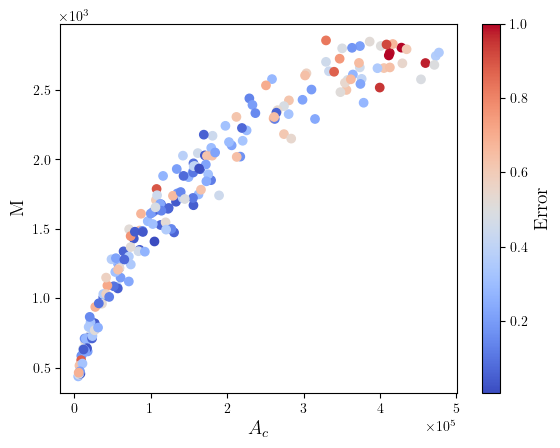

In [615]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_kb[y_test_class==1])
col1 = np.abs(y_test_kb[y_test_class==0] - y_predict_lr_bound)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-bound-error-predictwithoutclass.eps',format='eps',dpi=300)
plt.show()

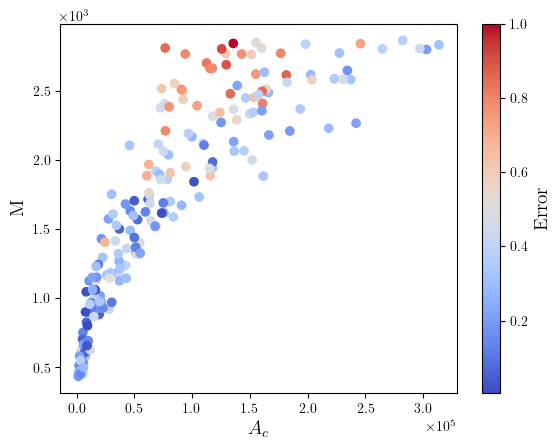

In [616]:
fig = plt.figure()
X_test_heatmap_b = pd.DataFrame(X_test_kb[y_test_class==0])
col1 = np.abs(y_test_kb[y_test_class==1] - y_predict_lr_kernel)
col1 = col1/col1.max()
sc = plt.scatter(X_test_heatmap_b.get(4), X_test_heatmap_b.get(5), c=col1, cmap='coolwarm')
xtex = r"$A_c$"
ytext = r"M"
ctex = r"Error"
plt.xlabel(xlabel=xtex)
plt.ylabel(ylabel=ytext)
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.colorbar(sc, label=ctex)
plt.savefig('./figures/heatmap-kernel-error-predictwithoutclass.eps',format='eps',dpi=300)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


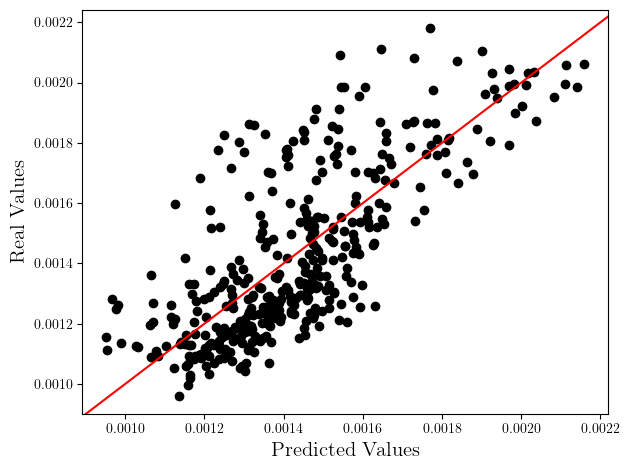

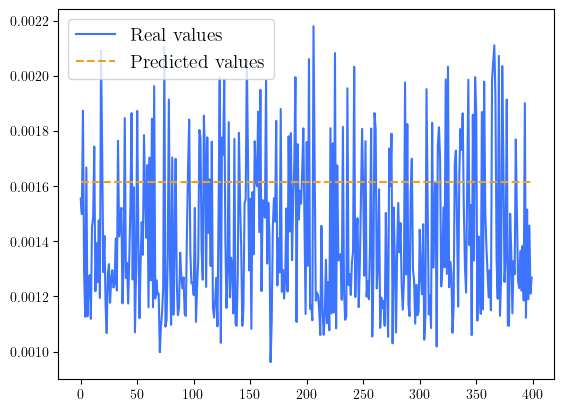

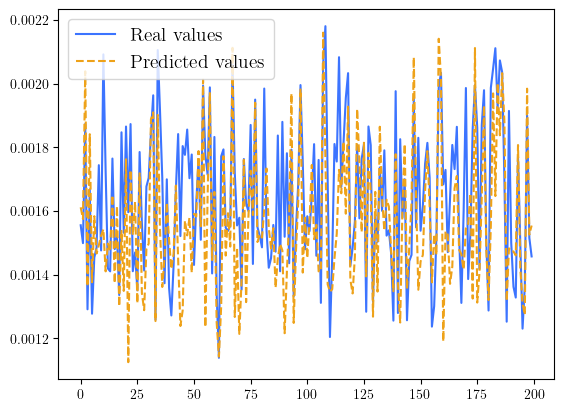

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


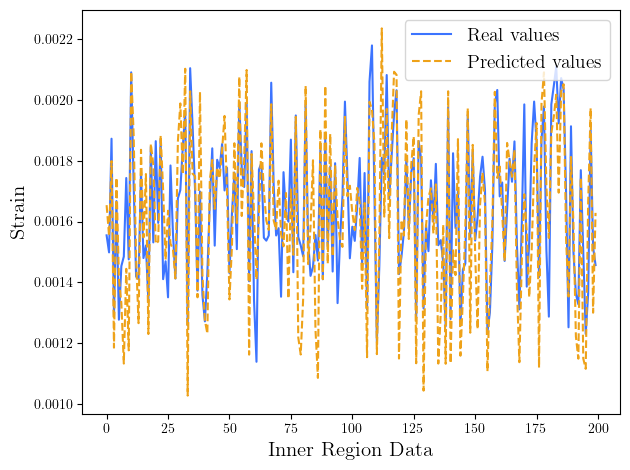

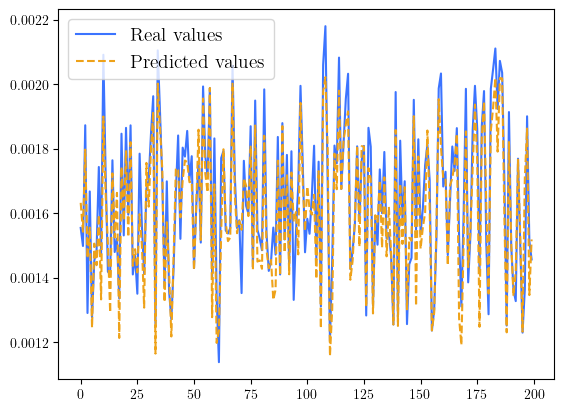

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


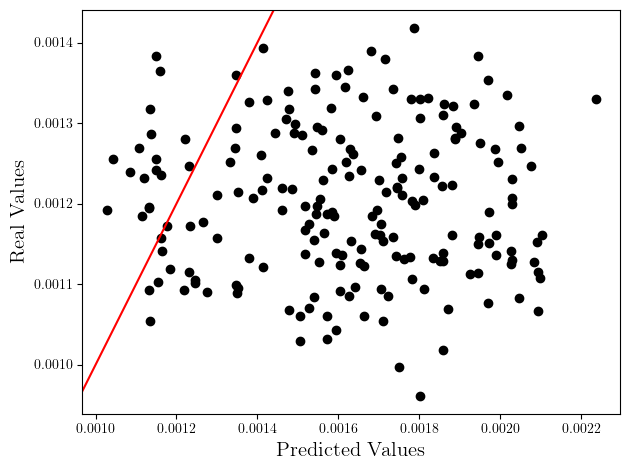

In [617]:
x=np.arange(0,len(y_test_kb),1)

fig1_kb = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.legend()
plt.tight_layout()
plt.savefig('./figures/withoutclass-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/withoutclass-regression.svg')
plt.show()

fig_true_predict_kb, ax = plt.subplots()
plt.plot(y_predict_lr_kb, y_test_kb, 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/withoutclass-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

fig2 = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_svr_kb, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig3 = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_dt_kb, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4 = plt.figure()
plt.plot(x,y_test_kb, '-', color=pretty_blue, label='Real values')
plt.plot(x,y_predict_rf_kb, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

x2 = np.arange(0,len(y_test_kb[y_test_class==0]),1)

fig1k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_lr_kernel, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig2k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_svr_kernel, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig3k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_dt_kernel, '--', color=nice_orange, label='Predicted values')
plt.xlabel('Inner Region Data', fontsize=15)
plt.ylabel('Strain', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/kernel-withoutclass-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/kernel-withoutclass-regression.svg')
plt.show()

fig_true_predict_kb, ax = plt.subplots()
plt.plot(y_predict_dt_kernel, y_test_kb[y_test_class==0], 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/kernel-withoutclass-regression-true-predict.eps',format='eps',dpi=300)
plt.show()

fig4k = plt.figure()
plt.plot(x2,y_test_kb[y_test_class==0], '-', color=pretty_blue, label='Real values')
plt.plot(x2,y_predict_rf_kernel, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

x3 = np.arange(0,len(y_test_kb[y_test_class==1]),1)

fig1b = plt.figure()
plt.plot(x3,y_test_kb[y_test_class==1], '-', color=pretty_blue, label='Real values')
plt.plot(x3,y_predict_lr_bound, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig2b = plt.figure()
plt.plot(x3,y_test_kb[y_test_class==1], '-', color=pretty_blue, label='Real values')
plt.plot(x3,y_predict_svr_bound, '--', color=nice_orange, label='Predicted values')
plt.legend()
plt.show()

fig4b = plt.figure()
plt.plot(x3,y_test_kb[y_test_class==1], '-', color=pretty_blue, label='Real values')
plt.plot(x3,y_predict_rf_bound, '--', color=nice_orange, label='Predicted values')
plt.xlabel('Boundary Data', fontsize=15)
plt.ylabel('Strain', fontsize=15)
plt.legend()
plt.tight_layout()
plt.savefig('./figures/bound-withoutclass-regression.eps',format='eps',dpi=300)
plt.savefig('./figures/bound-withoutclass-regression.svg')
plt.show()

fig_true_predict_kb, ax = plt.subplots()
plt.plot(y_predict_dt_kernel, y_test_kb[y_test_class==1], 'ok')
lim_x = ax.get_xlim()
lim_y = ax.get_ylim()
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, '-r')
ax.set_xlim(lim_x)
ax.set_ylim(lim_y)
plt.xlabel('Predicted Values', fontsize=15)
plt.ylabel('Real Values', fontsize=15)
plt.tight_layout()
plt.savefig('./figures/bound-withoutclass-regression-true-predict.eps',format='eps',dpi=300)
plt.show()